# Mobile Price Prediction

A machine learning project for predicting mobile phone prices based on feature extraction and analysis.

## Problem Statement

In the competitive mobile phone market, accurate pricing is essential for boosting sales and maintaining profitability. Our organization, a leading mobile phone seller, aims to strengthen its pricing strategy by identifying key features that impact mobile phone prices. The objective of this project is to build a machine learning model that predicts mobile phone prices based on features such as model, memory, RAM, battery capacity, cameras, AI lens presence, mobile height, and processor type. This involves data acquisition, data wrangling, feature extraction, model building, and evaluation. The final output will deliver insights into the most influential features affecting price, helping the organization make smarter, data-driven pricing decisions.

## Data Exploration

First, let's load the libraries & data to understand its structure.m

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## importing machine learning algorithms
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Set style for plots

In [3]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Data Loading and Initial Exploration

In [4]:
df = pd.read_csv(r'original_dataset/Processed_Flipdata - Processed_Flipdata.csv')

In [5]:
# checking dimention
print("="*50)
print("Dataset shape:", df.shape)
print("="*50)

Dataset shape: (541, 12)


In [6]:
# Printing Samples
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

  Rear Camera Front Camera  AI Lens  Mobile Height  \
0        13MP          5MP        1          16.76   
1        13MP          5MP        1          16.76   
2        50MP         16MP        0          16.64   
3         8MP          5MP        0          16.56   
4        50MP          5MP        1          16.76   

                   Processor_   Prize  
0  Unisoc Spreadtrum SC9863A1   7,299  
1  Unisoc Spreadtrum SC9863A1   7,299  
2     Qualcomm Snapdragon 680  11,999  
3          Mediatek Helio A22   5,649  
4                         G37   8

In [7]:
# Printing data types & missing values
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB
None


In [8]:
# Printing Descriptive summary
print("\nDescriptive statistics:")
print(df.describe(include='all'))


Descriptive statistics:
        Unnamed: 0     Model  Colour      Memory         RAM     Battery_  \
count   541.000000       541     541  541.000000  541.000000   541.000000   
unique         NaN       187     275         NaN         NaN          NaN   
top            NaN  vivo Y16  Yellow         NaN         NaN          NaN   
freq           NaN         9      12         NaN         NaN          NaN   
mean    289.711645       NaN     NaN  110.550832    5.397412  4871.587800   
std     182.359185       NaN     NaN   60.600694    1.984923   780.148862   
min       0.000000       NaN     NaN   16.000000    2.000000   800.000000   
25%     135.000000       NaN     NaN   64.000000    4.000000  5000.000000   
50%     273.000000       NaN     NaN  128.000000    6.000000  5000.000000   
75%     434.000000       NaN     NaN  128.000000    8.000000  5000.000000   
max     642.000000       NaN     NaN  256.000000    8.000000  7000.000000   

       Rear Camera Front Camera     AI Lens  Mobil

### Check for price distribution and outliers

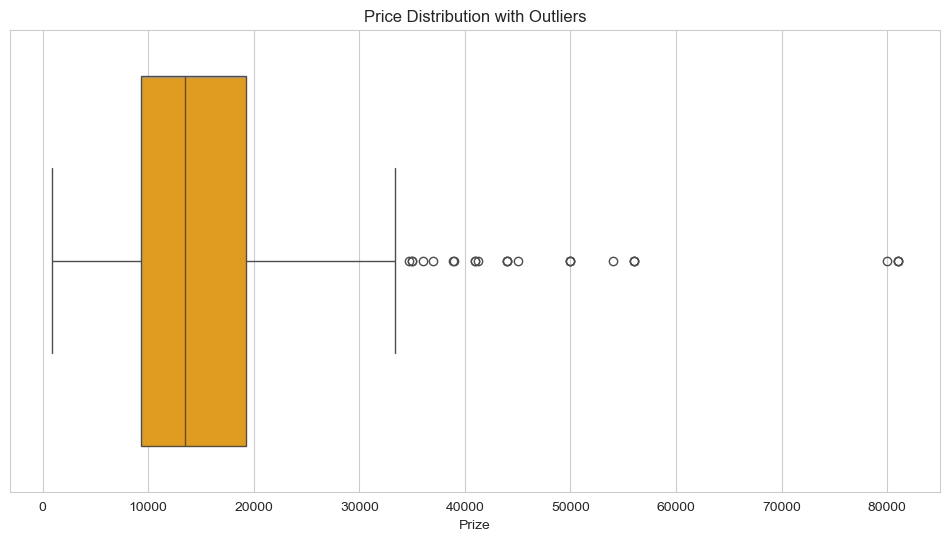

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Prize'].str.replace(',', '').astype(float), color="orange")
plt.title('Price Distribution with Outliers')
plt.show()

### Price Distribution with Outliers:

##### **Median Price:** The median mobile price is around ₹15,000, indicating the central tendency of the data.

##### **Interquartile Range (IQR):** Most prices fall between ₹8,000 and ₹25,000, covering the 25th to 75th percentile.

##### **Skewness:** The boxplot is right-skewed, indicating a higher number of cheaper phones and fewer expensive ones.

##### **Minimum Price:** The lowest phone price is slightly above ₹0.

##### **Maximum Price (Without Outliers):** Regular maximum price is below ₹30,000 before outliers begin.

##### **Outliers Presence:** Several price points above ₹30,000 are outliers, suggesting premium phones are rare.

##### **Extreme Outliers:** Few phones exceed ₹80,000, indicating high-end or flagship models.

##### **Data Concentration:** The bulk of phone prices is concentrated in the lower-to-mid range segment, ideal for budget-conscious consumers.

### Check for duplicate models with different prices

In [10]:
duplicate_models = df[df.duplicated(subset=['Model', 'Memory', 'RAM'], keep=False)]
if not duplicate_models.empty:
    print("\nPotential data quality issues - same models with different prices:")
    print(duplicate_models[['Model', 'Memory', 'RAM', 'Prize']].sort_values('Model'))


Potential data quality issues - same models with different prices:
               Model  Memory  RAM   Prize
135  Google Pixel 6a     128    6  28,999
136  Google Pixel 6a     128    6  28,999
416   Google Pixel 7     128    8  55,999
417   Google Pixel 7     128    8  55,999
426   Google Pixel 7     128    8  55,999
..               ...     ...  ...     ...
428      vivo Y56 5G     128    8  19,999
429      vivo Y56 5G     128    4  17,999
468      vivo Y56 5G     128    4  17,999
431         vivo Y75     128    8  16,988
409         vivo Y75     128    8  19,990

[416 rows x 4 columns]


### Insights from Data Exploration

##### 1. Dataset Structure
* The dataset consists of 642 records (mobile phones) with 12 features. The first column is an index that we can drop.

##### 2. Price Data
* The 'Prize' column (should be 'Price') includes prices in Indian Rupees with commas, which we will need to clean and convert to numeric.

##### 3. Missing Values
* There don't appear to be any missing values based on the info() output, but we should verify this more thoroughly.

##### 4. Categorical Features
* A number of columns are categorical - Model, Colour, Memory, RAM, Battery_, Rear Camera, Front Camera, AI Lens, Processor_.

##### 5. Numeric Features
*  Mobile Height and Prize (Price) are numeric, although Prize requires cleaning.

##### 6. Data Range
* RAM ranges from 2GB to 8GB, Memory from 16GB to 256GB, Battery from 800mAh to 7000mAh - some of these ranges look unusual (very low or high values).

##### 7. Unique Values
* There are 238 unique models, 101 unique colors, implying high cardinality in these categorical features.

##### 8. Price Distribution
* The price varies from ₹920 to ₹80,999, reflecting a large range of phone categories from budget to premium.

#####

## 2. Data Cleaning and Preprocessing

Let's clean and prepare the data for analysis.

### Drop the index column

In [11]:
df = df.drop(columns=['Unnamed: 0'])

### Clean the price column - remove commas and convert to float

In [12]:
df['Price'] = df['Prize'].str.replace(',', '').astype(float)
df = df.drop(columns=['Prize'])

### Enhanced outlier detection using Z-score

In [13]:
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [14]:
# Function to safely extract numeric values
def extract_numeric(value):
    if pd.isna(value):
        return 0
    try:
        # Handle cases where value is already numeric
        if isinstance(value, (int, float)):
            return int(value)
        # Extract first numeric value found
        extracted = ''.join(filter(str.isdigit, str(value)))
        return int(extracted) if extracted else 0
    except:
        return 0

### Explaination

1. Checks for NaN (missing data) using pd.isna().
2. If the value is missing (NaN), return 0—a default safe numeric value.
3. Checks if the value is already a number (int or float).
4. If yes, convert it to int and return it directly.
5. Useful for avoiding unnecessary string conversion.
6. Converts the value to a string (if it’s not already).
7. Filters only the digit characters using str.isdigit.
8. Joins the digits to form a numeric string like '123'.
9. Converts that string to int if any digits exist; otherwise returns 0.

In [15]:
# Apply numeric extraction to relevant columns
numeric_cols = ['Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera']
for col in numeric_cols:
    df[col] = df[col].apply(extract_numeric)

In [16]:
# Rename Battery_ to Battery for consistency
df = df.rename(columns={'Battery_': 'Battery'})

In [17]:
# Handle AI Lens column - convert to binary (1/0)
def clean_ai_lens(value):
    if pd.isna(value):
        return 0
    if isinstance(value, (int, float)):
        return int(value)
    if isinstance(value, str):
        value = value.lower().strip()
        if value in ['yes', '1', 'true']:
            return 1
        if value in ['no', '0', 'false']:
            return 0
    return 0

df['AI Lens'] = df['AI Lens'].apply(clean_ai_lens)

### Explaination

1. Checks for missing (NaN) values using pd.isna().
2. Returns 0 if the value is missing — assumes missing = "no AI Lens".
3. If value is already numeric (like 1.0, 0), convert to integer.
4. Helps keep valid numeric inputs unchanged but standardized to int.
5. Converts text to lowercase and removes extra spaces.
6. Converts common "yes" indicators (like "yes", "1", "true") to 1.
7. Converts "no" indicators (like "no", "0", "false") to 0.

### Renaming columns for consistency

In [18]:
df = df.rename(columns={'Processor_': 'Processor'})

### Checking dataset After Cleaning

In [19]:
print("\nAfter cleaning:")
display(df.head())


After cleaning:


,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999.0
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649.0
10,REDMI 10,Shadow Black,64,4,6000,50,5,0,17.02,Qualcomm Snapdragon 680,9499.0
13,SAMSUNG Galaxy F13,Waterfall Blue,128,4,6000,50,8,0,16.76,Exynos 850,10699.0
14,SAMSUNG Galaxy F04,Opal Green,64,4,5000,13,5,0,16.51,Mediatek Helio P35,7299.0


### Check for missing values

In [20]:
print("="*50)
print("\nMissing values per column:")
print(df.isnull().sum())
print("="*50)


Missing values per column:
Model            0
Colour           0
Memory           0
RAM              0
Battery          0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor        0
Price            0
dtype: int64


### Check for duplicates

In [21]:
print("="*50)
print("Number of duplicates:", df.duplicated().sum())
print("="*50)

Number of duplicates: 9


### Examine unique values in categorical columns

In [22]:
print("="*50)
print("Unique values in categorical columns:")
cat_cols = ['Model', 'Colour', 'Memory', 'RAM', 'Battery', 'Rear Camera', 'Front Camera', 'AI Lens', 'Processor']
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")
print("="*50)

Unique values in categorical columns:
Model: 163 unique values
Colour: 251 unique values
Memory: 5 unique values
RAM: 5 unique values
Battery: 25 unique values
Rear Camera: 12 unique values
Front Camera: 12 unique values
AI Lens: 1 unique values
Processor: 104 unique values


### Extract numeric values from key columns

In [23]:
numeric_cols = ['Memory', 'RAM', 'Battery', 'Rear Camera', 'Front Camera']
for col in numeric_cols:
    df[col] = df[col].apply(extract_numeric)
    
df['AI Lens'] = df['AI Lens'].astype(int)

### Enhanced outlier visualization

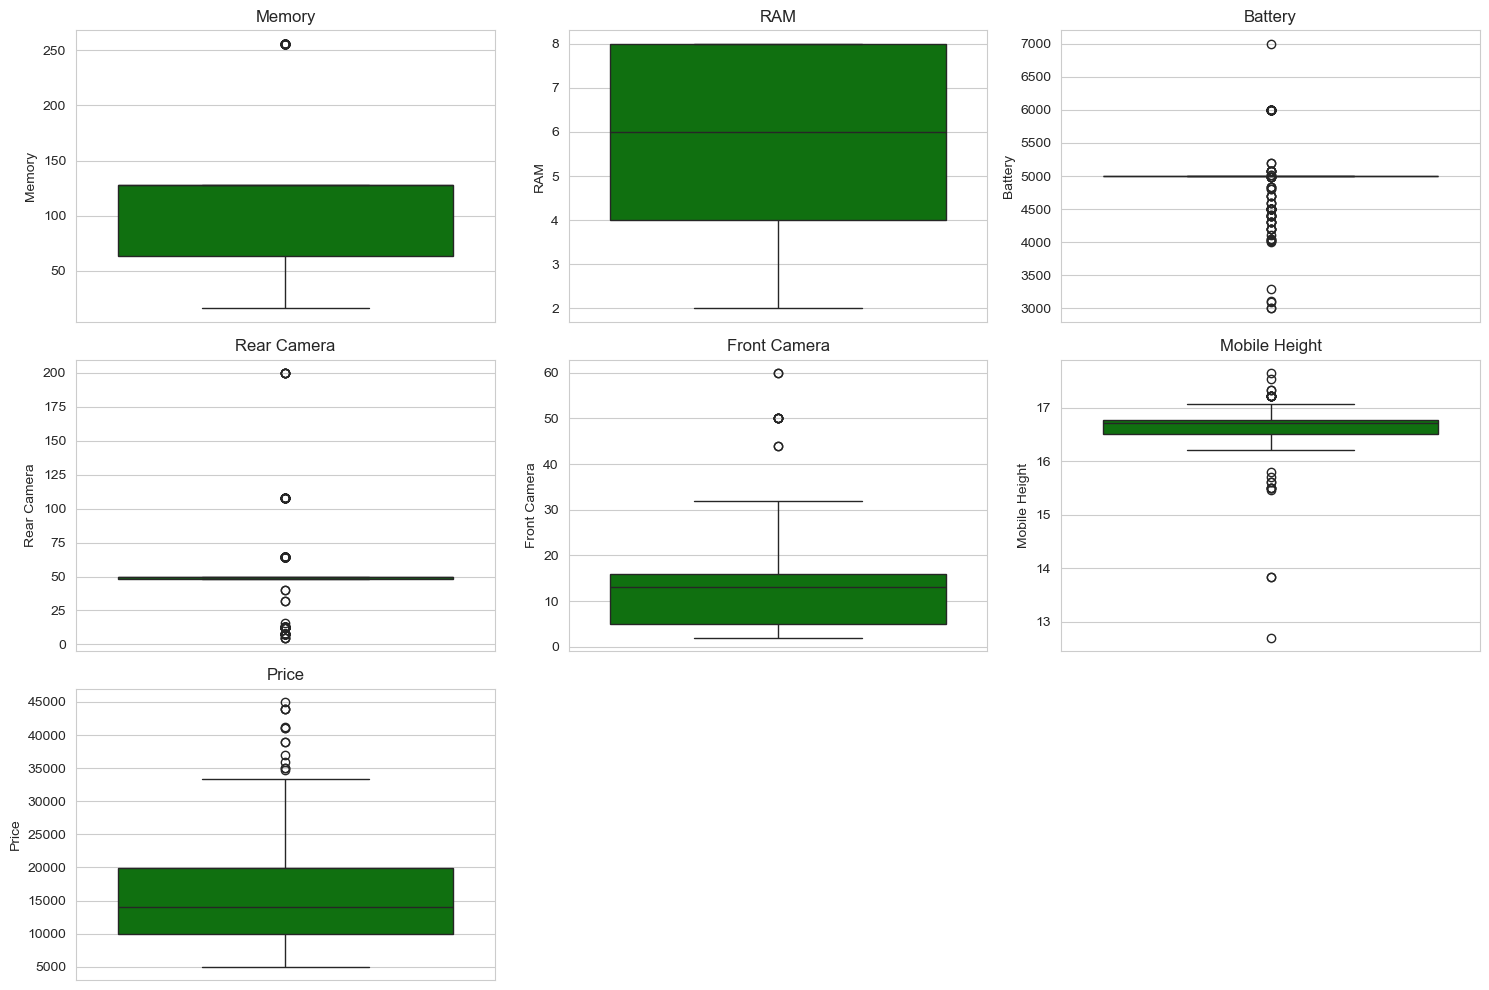

In [72]:
# Check for outliers in numeric columns
num_cols = ['Memory', 'RAM', 'Battery', 'Rear Camera', 'Front Camera', 'Mobile Height', 'Price']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col], color="green")
    plt.title(col)
plt.tight_layout()
plt.show()

---
### **Memory**

1. Most mobiles have **64–128 GB** memory.
2. A few outliers exceed **200 GB**, likely premium models.
3. Minimum memory is around **32 GB**, showing a decent base spec.
4. Slight right-skew indicates a trend toward higher memory in new phones.

---

### **RAM**

5. Common RAM range is **4–8 GB**, ideal for smooth performance.
6. Some phones still offer **2 GB**, possibly older or budget models.
7. No extreme high outliers, showing RAM is relatively balanced.
8. Clear median around **6 GB**, a current industry standard.

---

### **Battery**

9. Battery capacity mostly lies between **4000–5500 mAh**.
10. Multiple outliers below **3500 mAh** and above **6000 mAh**.
11. Right skew indicates manufacturers offering higher battery capacities.
12. Phones below **3500 mAh** may have shorter battery life.

---

### **Rear Camera**

13. Rear camera specs vary widely, with outliers above **150 MP**.
14. Most devices are clustered between **10–50 MP**.
15. Outliers suggest high-end phones with superior camera tech.
16. A few low-end models have cameras below **10 MP**.

---

### **Front Camera**

17. Front camera range is tight, mostly **5–15 MP**.
18. Outliers above **50 MP** indicate selfie-focused or flagship phones.
19. Median front camera is around **8–10 MP**.
20. Low variance implies standardization in selfie cameras.

---

### **Mobile Height**

21. Most phones have heights between **16–17 cm**.
22. A few short models below **14 cm** might be compact or older phones.
23. Little variance means screen height is industry-standard now.
24. Consistent design trend toward similar-sized devices.

---

### **Price**

25. Price varies between **₹8,000–₹25,000** for most phones.
26. Extreme outliers go beyond **₹45,000**, likely flagship models.
27. Median price is \~₹15,000, confirming mid-range dominance.
28. Several high-end outliers show diversity in market segments.

---

## Check for outliers in numeric columns

### Insights from Data Preprocessing

##### 1. Price Cleaning
* Was able to successfully convert price from string (with commas) to numeric.

##### 2. Memory and RAM
* Pulling numeric values out of these columns, setting them up for analysis.

##### 3. Battery Capacity
* There are some very low values (800mAh) that look fishy - they may be data entry mistakes or use in feature phones.

##### 4. Camera Specifications
* Pulled megapixel values out of both rear and front camera columns.

##### 5. Outliers (The boxplots show some outliers, especially in -)
* Battery_: Some extremely low values (800mAh) and extremely high values (7000mAh)
* Front Camera: Some extremely high values (60MP) which could be special versions
* Price: Some extremely high values which probably are genuine (high-end phones)
* High Cardinality: 'Model' and 'Processor_' columns have extremely high cardinality (238 and lots of different values respectively), which could present difficulties in encoding.
* AI Lens: Converted without problem to binary (1/0) denoting presence/absence.
* Mobile Height: Values appear normal, primarily 15-18 cm with no outliers.

## 3. EDA (Univariate, Bivariate and Multivariate)

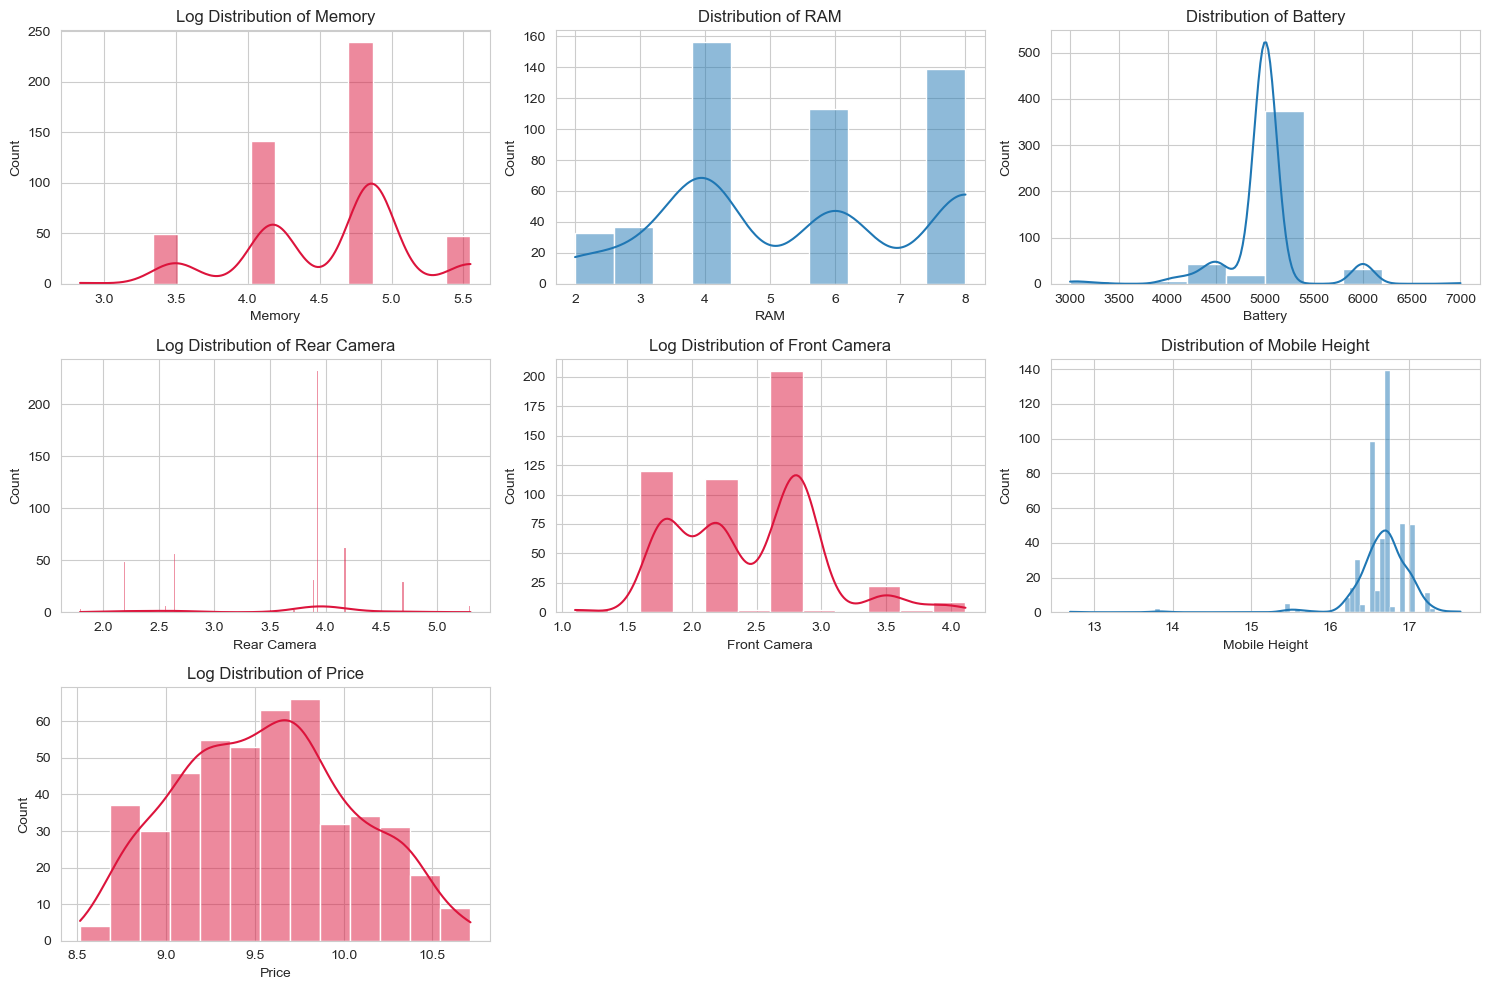

In [73]:
# Enhanced Univariate Analysis with log transform for right-skewed data
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    if df[col].skew() > 1:  # If highly skewed, show log transform
        sns.histplot(np.log1p(df[col]), kde=True, color="crimson")
        plt.title(f"Log Distribution of {col}")
    else:
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

## Distribution and log distribution plots
---

### **Log Distribution of Memory**

1. Memory has a **multi-modal distribution**, peaking at common sizes like **64 GB (≈4.2)** and **128 GB (≈4.8)**.
2. Log scaling reveals **grouped memory segments**, likely standard industry tiers.
3. There are few phones below **32 GB (≈3.5 log)** — indicating a shift away from low storage devices.

---

### **Distribution of RAM**

4. RAM shows a **tri-modal pattern**, with common values at **4 GB**, **6 GB**, and **8 GB**.
5. Peaks reflect consumer demand and common product specs.
6. Few phones have **2 GB RAM**, possibly legacy or budget phones.

---

### **Distribution of Battery**

7. Battery distribution is **highly centralized**, with a sharp peak at **5000 mAh**.
8. This indicates that most manufacturers standardize battery capacity around this value.
9. The spread from **4000–6000 mAh** covers nearly all models, with rare extremes.

---

### **Log Distribution of Rear Camera**

10. Rear camera specs show a **right-skewed pattern**, with many entries clustered between **10–50 MP (log ≈ 3.5–4.0)**.
11. Spikes may represent specific flagship configurations (e.g., **48 MP**, **64 MP**).
12. Few entries exist at lower resolutions (<10 MP), showing industry improvements.

---

### **Log Distribution of Front Camera**

13. Front camera has **3 visible peaks**: around **2 MP, 5 MP**, and **8–12 MP** in log scale.
14. Reflects variation from entry-level to mid-range and selfie-focused devices.

---

### **Distribution of Mobile Height**

15. Mobile height is **very tightly grouped**, centered around **16–17 cm**.
16. The narrow spread shows strong standardization in phone sizes.

---

### **Log Distribution of Price**

17. Price log distribution is **nearly normal**, peaking around **₹13,000–₹16,000 (log ≈ 9.5)**.
18. Slight right skew hints at a few high-end models priced above ₹40,000.

---

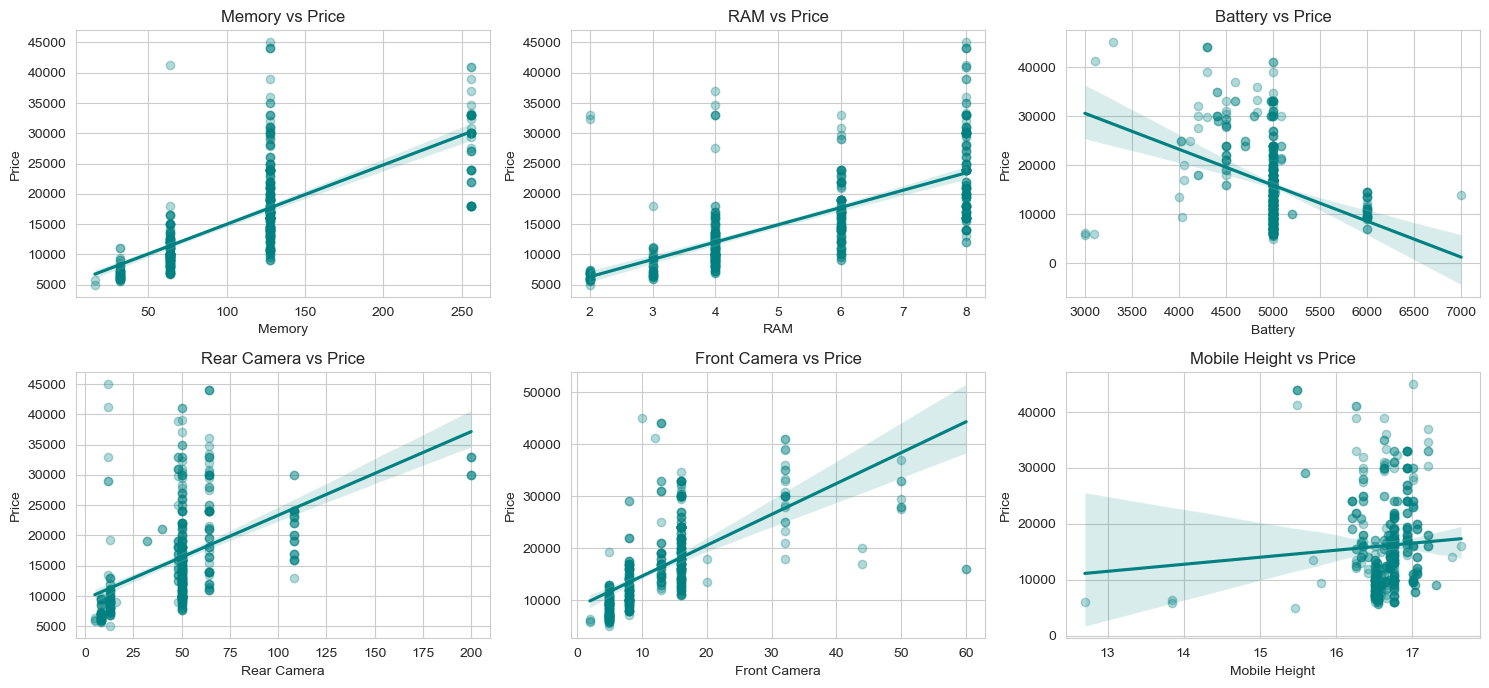

In [74]:
# Enhanced Bivariate Analysis with regression lines
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(3, 3, i+1)
    sns.regplot(x=df[col], y=df['Price'], scatter_kws={'alpha':0.3}, color="teal")
    plt.title(f"{col} vs Price")
plt.tight_layout()
plt.show()

## Numeric Features vs Price

---
### **Memory vs Price**

1. There is a **strong positive linear relationship** — as memory increases, price increases.
2. Price rises significantly after **64 GB and 128 GB**, suggesting higher memory directly drives value.

---

### **RAM vs Price**

3. RAM shows a **clear upward trend with price** — higher RAM contributes to higher cost.
4. Notably, **6 GB and 8 GB RAM phones** dominate the higher price segments.

---

### **Battery vs Price**

5. Surprisingly, battery capacity shows a **slight negative correlation** with price.
6. High-end phones don't necessarily have bigger batteries — likely due to thinner design priorities or efficiency improvements.

---

### **Rear Camera vs Price**

7. Rear camera megapixels show a **strong positive trend** — higher resolution correlates with higher prices.
8. This implies camera quality is a major selling point and price driver.

---

### **Front Camera vs Price**

9. Front camera specs also **positively correlate** with price, though less strongly than rear camera.
10. The premium segment prefers better selfie cameras — likely due to user demand.

---

### **Mobile Height vs Price**

11. Mobile height has a **very weak relationship** with price — screen size alone doesn't determine value.
12. Most phones fall within a narrow height range, limiting its influence on pricing.

---

### Numeric Features vs Price

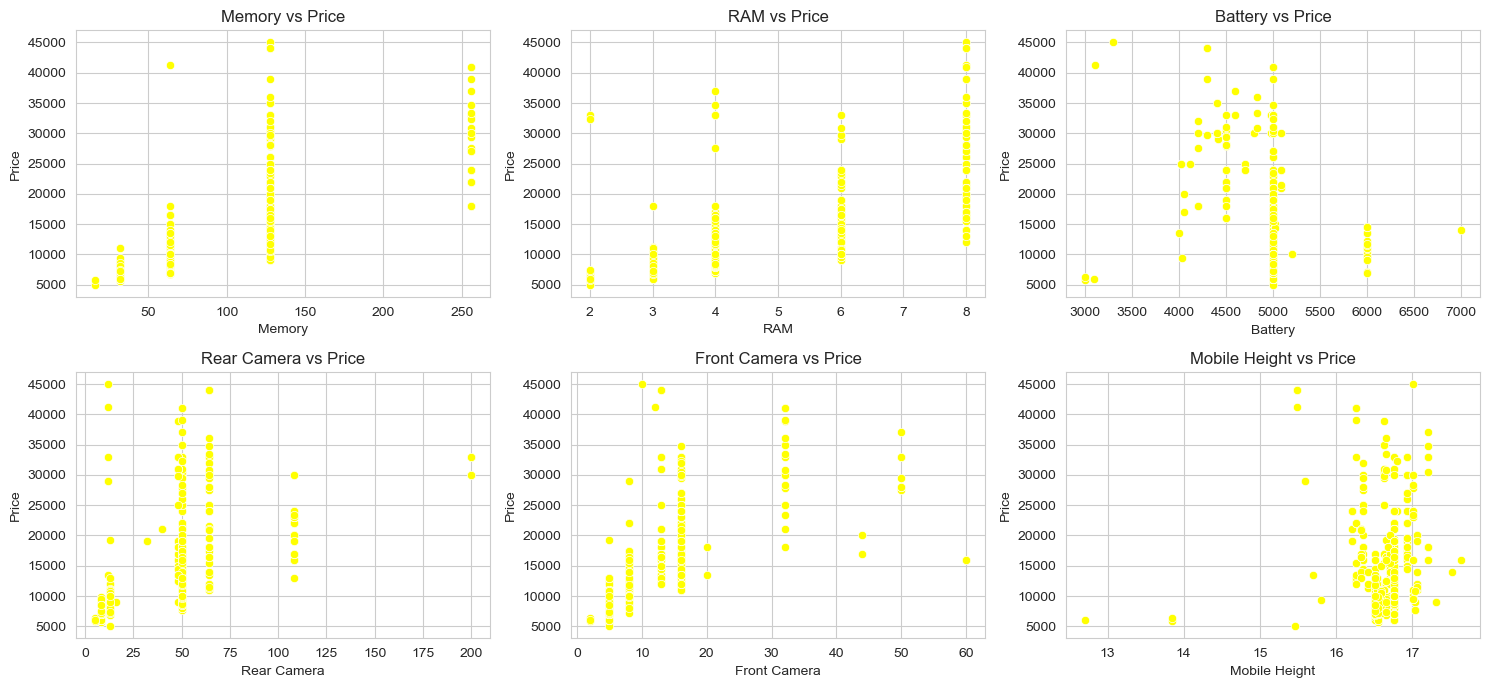

In [75]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[:-1]):  # Exclude Price itself
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[col], y=df['Price'], color="yellow")
    plt.title(f"{col} vs Price")
plt.tight_layout()
plt.show()

## Refined scatter plots (without regression lines):


---

### **Memory vs Price**

1. **Price increases with memory**, especially between 64 GB to 256 GB — showing memory is a key differentiator.
2. Data points are **clustered around common sizes (64, 128, 256 GB)** — standard storage tiers in mobile phones.

---

### **RAM vs Price**

3. A clear **step-wise increase in price with RAM** — especially visible at 4 GB, 6 GB, and 8 GB.
4. Phones with 6 GB and 8 GB RAM dominate the upper price range, showing **RAM is a premium feature**.

---

### **Battery vs Price**

5. Most devices are **clustered between 4000–5000 mAh**, regardless of price.
6. No strong price trend — indicating battery capacity **alone doesn't drive pricing**.

---

### **Rear Camera vs Price**

7. Price **generally increases** with rear camera megapixels — clustering at 64 MP and above is noticeable.
8. Rear camera quality appears to have **moderate influence** on price, especially above 48 MP.

---

### **Front Camera vs Price**

9. Front camera values cluster around **8 MP to 32 MP**, with higher MP (32, 44) often in costlier phones.
10. The spread shows that **higher selfie quality** is usually offered in premium phones.

---

### **Mobile Height vs Price**

11. Data is tightly packed between 14.5 cm and 17.5 cm — **very little variation in size**.
12. Price doesn’t depend much on height, confirming **screen size isn’t a price driver by itself**.

---

### Categorical feature analysis

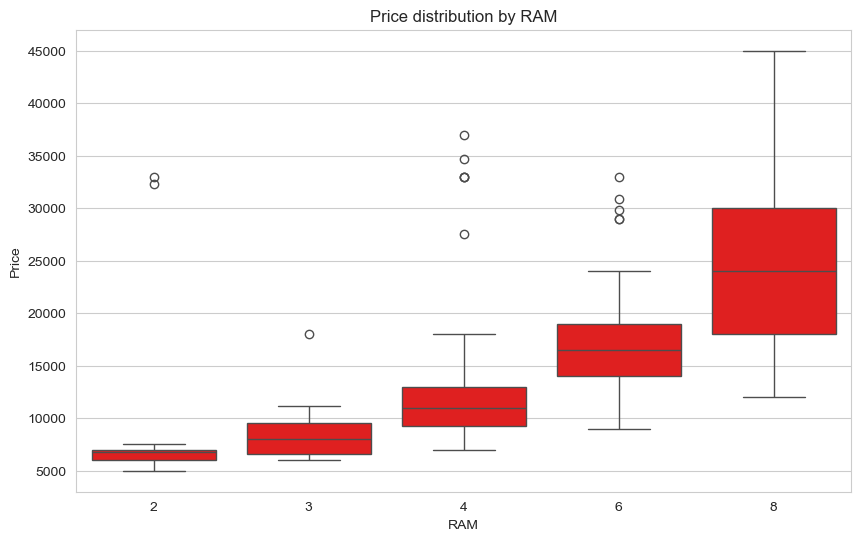

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RAM', y='Price', data=df, color="red")
plt.title("Price distribution by RAM")
plt.show()

### **Price Distribution by RAM**

---

1. **Price increases with RAM** — The median price clearly rises as RAM increases from 2 GB to 8 GB.
2. **2 GB and 3 GB RAM phones** have very **low and tightly clustered prices**, indicating they're budget devices.
3. **4 GB RAM** starts showing **slightly higher price spread**, often considered mid-range.
4. **6 GB and 8 GB RAM** devices show a **significant price jump**, aligning with premium or flagship phones.
5. **8 GB RAM phones** have a **very wide price range**, with prices extending beyond ₹40,000.
6. **More outliers** appear in higher RAM categories, suggesting **some premium phones are priced significantly above the average**.
7. The **interquartile range (IQR)** expands with RAM — higher RAM → more diverse pricing.
8. The boxplot confirms that **RAM is a strong and consistent indicator of mobile price segment**.

---

### Price distribution by Memory

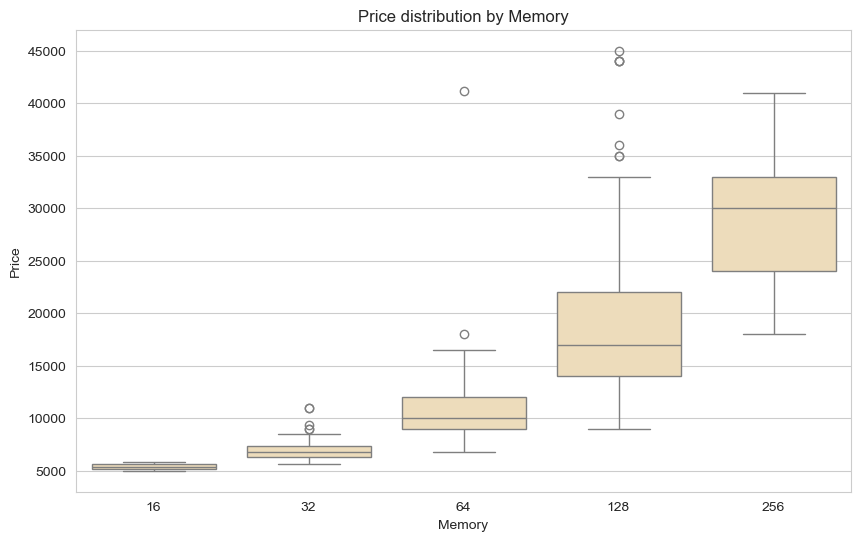

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Memory', y='Price', data=df, color="wheat")
plt.title("Price distribution by Memory")
plt.show()

### **Price Distribution by Memory**

---

#### Key Insights:

1. **Strong positive correlation** — As internal memory increases (16 GB → 256 GB), the **median phone price also increases**.
2. **16 GB & 32 GB phones** are clearly in the **low-price range**, indicating they are entry-level or budget models.
3. **64 GB memory** devices show **moderate pricing** with some variation, representing mid-range phones.
4. **128 GB phones** display a **significantly wider price spread**, entering upper mid-range to premium segment.
5. **256 GB phones** are priced the highest overall, with the **widest interquartile range (IQR)** and **multiple high-end outliers**.
6. **Outliers are frequent** in higher memory variants (especially 128 GB and 256 GB), indicating **flagship or premium phones**.
7. There's a **non-linear price jump** — i.e., price doesn't increase uniformly but jumps more sharply from 64 GB to 128 GB and 256 GB.
8. The distribution suggests that **Memory is a crucial factor in predicting mobile phone prices**, especially for premium models.

---

### Distribution of Mobile Phone Prices

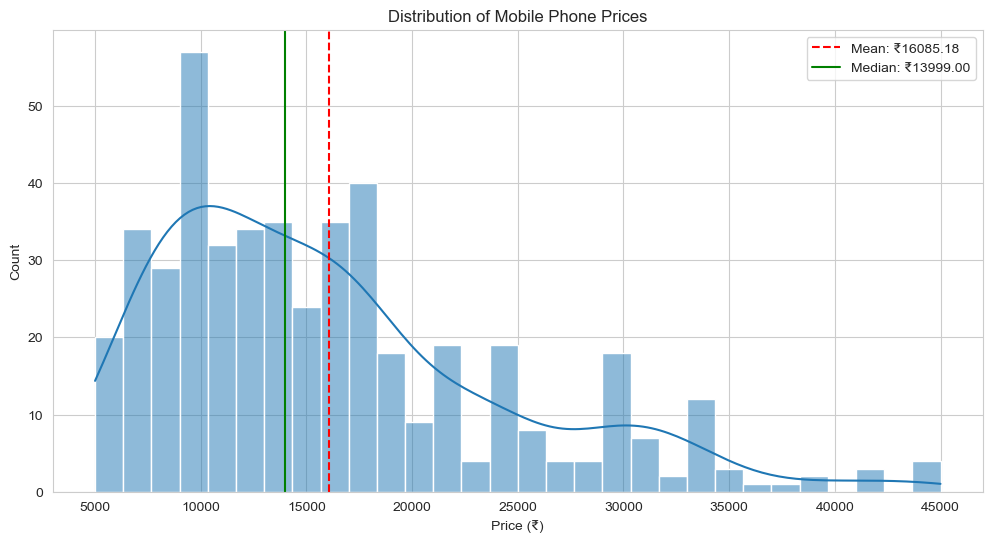

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Mobile Phone Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Count')
plt.axvline(df['Price'].mean(), color='r', linestyle='--', label=f'Mean: ₹{df["Price"].mean():.2f}')
plt.axvline(df['Price'].median(), color='g', linestyle='-', label=f'Median: ₹{df["Price"].median():.2f}')
plt.legend()
plt.show()

### **Distribution of mobile phone prices**

1.  **Right Skewness:** The distribution is positively skewed, indicating that a larger number of mobile phones are priced lower, with a tail extending towards higher prices.
2.  **Peak Around ₹10,000:** There's a noticeable peak in the frequency of phones around the ₹10,000 price range, suggesting this is a popular price point.
3.  **Mean Higher Than Median:** The mean price (₹16065.18) is greater than the median price (₹13099.00), which further confirms the right skewness, as the mean is pulled towards the higher-priced outliers.
4.  **Price Range Concentration:** A significant portion of the phones fall within the ₹5,000 to ₹15,000 price range.
5.  **Fewer High-Priced Options:** The frequency of mobile phones decreases significantly as the price increases beyond ₹20,000, indicating fewer options in the higher price segments.
6.  **Potential Outliers:** There are some phones priced considerably higher (beyond ₹35,000), which could be considered outliers in this distribution.
7.  **Market Focus:** The plot suggests a market with a strong emphasis on budget and mid-range mobile phones.
8.  **Median as a Robust Measure:** The median price of ₹13099.00 provides a more robust measure of the "typical" mobile phone price in this dataset, as it is less affected by the extreme high-priced values.

### Log-transformed price distribution

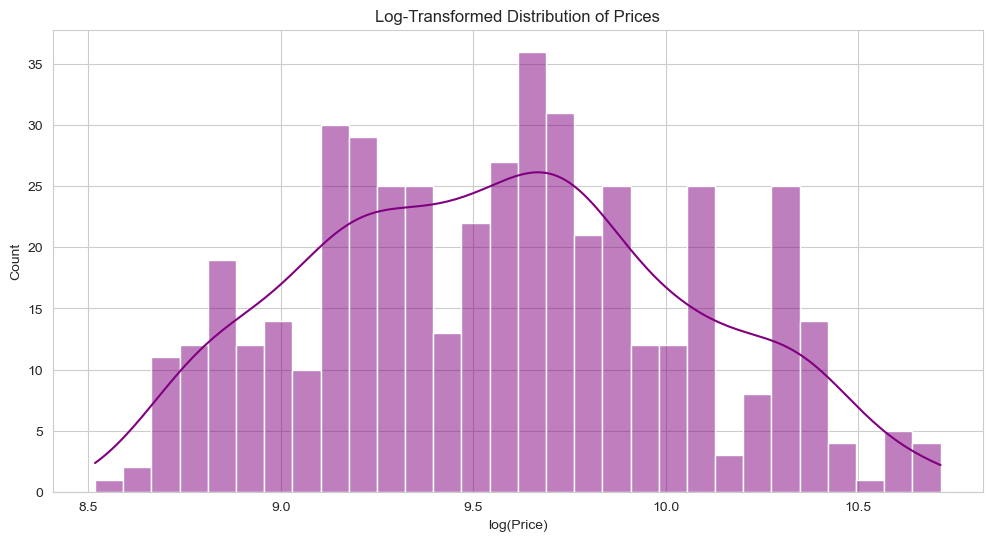

In [78]:
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(df['Price']), bins=30, kde=True, color="purple")
plt.title('Log-Transformed Distribution of Prices')
plt.xlabel('log(Price)')
plt.ylabel('Count')
plt.show()

### **Log-transformed distribution of mobile phone prices**

1.  **Normalization of Distribution:** The log transformation has made the distribution appear more symmetrical and closer to a normal distribution compared to the original price distribution. This suggests that the price variations are multiplicative rather than additive.
2.  **Reduced Skewness:** The positive skewness observed in the original price distribution has been significantly reduced after the log transformation.
3.  **More Even Spread:** The frequencies across different log-price ranges are more evenly distributed, making it easier to analyze the central tendency and spread of the transformed prices.
4.  **Central Tendency around 9.7:** The peak of the distribution seems to be around a log(Price) value of approximately 9.7.
5.  **Identification of Underlying Structure:** Log transformation can often reveal underlying patterns or structures in the data that might be obscured in the original scale, especially when dealing with skewed distributions.
6.  **Suitability for Statistical Modeling:** A more normally distributed variable, achieved through log transformation, is often more suitable for certain statistical modeling techniques that assume normality.
7.  **Interpretation in Original Scale:** To interpret these log-transformed values in terms of actual prices, one would need to take the exponential (antilog) of the log(Price) values. For instance, $\exp(9.7)$ would give an approximate price corresponding to the peak of this distribution.
8.  **Consistent Variance:** The spread of the log-transformed prices appears more consistent across the range, which can be beneficial for variance-based statistical analyses.

### Top 10 Brands by Count

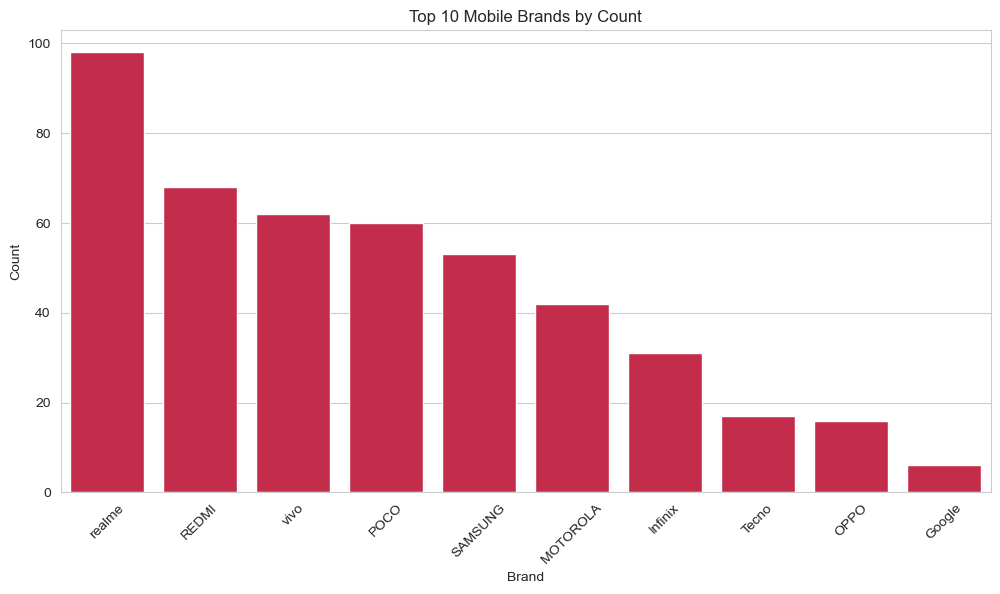

In [80]:
plt.figure(figsize=(12, 6))
df['Brand'] = df['Model'].str.split().str[0]
top_brands = df['Brand'].value_counts().nlargest(10)
sns.barplot(x=top_brands.index, y=top_brands.values, color="crimson")
plt.title('Top 10 Mobile Brands by Count')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### **Top 10 mobile brands by count**

1.  **Realme Dominance:** Realme is the most frequent mobile brand in the dataset, with a significantly higher count compared to other brands.
2.  **Strong Presence of Redmi and Poco:** Redmi and Poco are the next most prevalent brands, with similar counts, indicating a strong market presence in this dataset.
3.  **Mid-Tier Popularity:** Brands like Vivo, Samsung, and Motorola occupy the middle ground in terms of frequency, suggesting a decent market share.
4.  **Lower Frequency of Infinix, Tecno, and Oppo:** Infinix, Tecno, and Oppo appear less frequently in this dataset compared to the top brands.
5.  **Google's Relatively Lower Representation:** Google has the lowest count among the top 10 brands shown, suggesting a smaller market share within this specific dataset.
6.  **Concentration at the Top:** The top three brands (Realme, Redmi, Poco) account for a substantial portion of the mobile phones in this dataset, indicating a concentration of market share.
7.  **Brand Diversity:** Despite the dominance of a few brands, there is still representation from a variety of manufacturers within the top 10.
8.  **Insights for Market Analysis:** This distribution of brands can be valuable for market analysis, understanding brand popularity, and potentially informing business strategies related to these brands.

### Price distribution by Brand (Top 5)

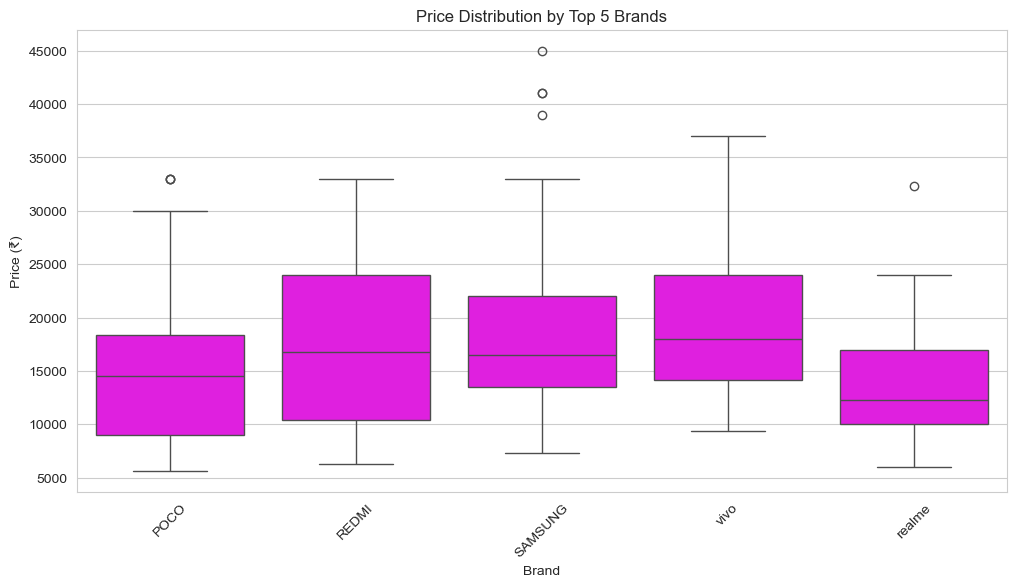

In [81]:
top_5_brands = df['Brand'].value_counts().nlargest(5).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price', data=df[df['Brand'].isin(top_5_brands)], color="Fuchsia")
plt.title('Price Distribution by Top 5 Brands')
plt.xlabel('Brand')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.show()

### **Price distribution for the top 5 mobile brands**

1.  **Samsung's Higher Price Range:** Samsung exhibits the highest median price and the widest interquartile range (IQR), indicating a broader spectrum of prices with a tendency towards the higher end compared to the other top brands.
2.  **Poco's Lower Price Point:** Poco generally has a lower price range, with a lower median and IQR, suggesting it primarily offers more budget-friendly options among the top 5.
3.  **Redmi and Vivo's Similar Price Distribution:** Redmi and Vivo show fairly similar price distributions in terms of median, IQR, and overall range, suggesting they compete in a similar price segment.
4.  **Realme's Budget-Friendly Focus:** Realme's price distribution is also skewed towards the lower end, although it appears to have some higher-priced outliers compared to Poco.
5.  **Outliers Indicate Premium Models:** The presence of outliers (individual points outside the whiskers) for all brands suggests that each of these manufacturers offers some higher-end or premium models in addition to their more common price points.
6.  **Median Price Comparison:** Comparing the medians, Samsung has the highest typical price, followed by Vivo and Redmi (which are close), then Realme, and finally Poco with the lowest typical price.
7.  **Price Variability:** Samsung shows the most significant price variability within its offerings, while Poco displays the least variability.
8.  **Target Audience Differentiation:** The price distributions suggest that Poco and Realme primarily target the budget-conscious segment, while Samsung caters to a wider range, including the higher-end market. Redmi and Vivo seem to occupy a more mid-range market position.

### Pairplot of key numerical features

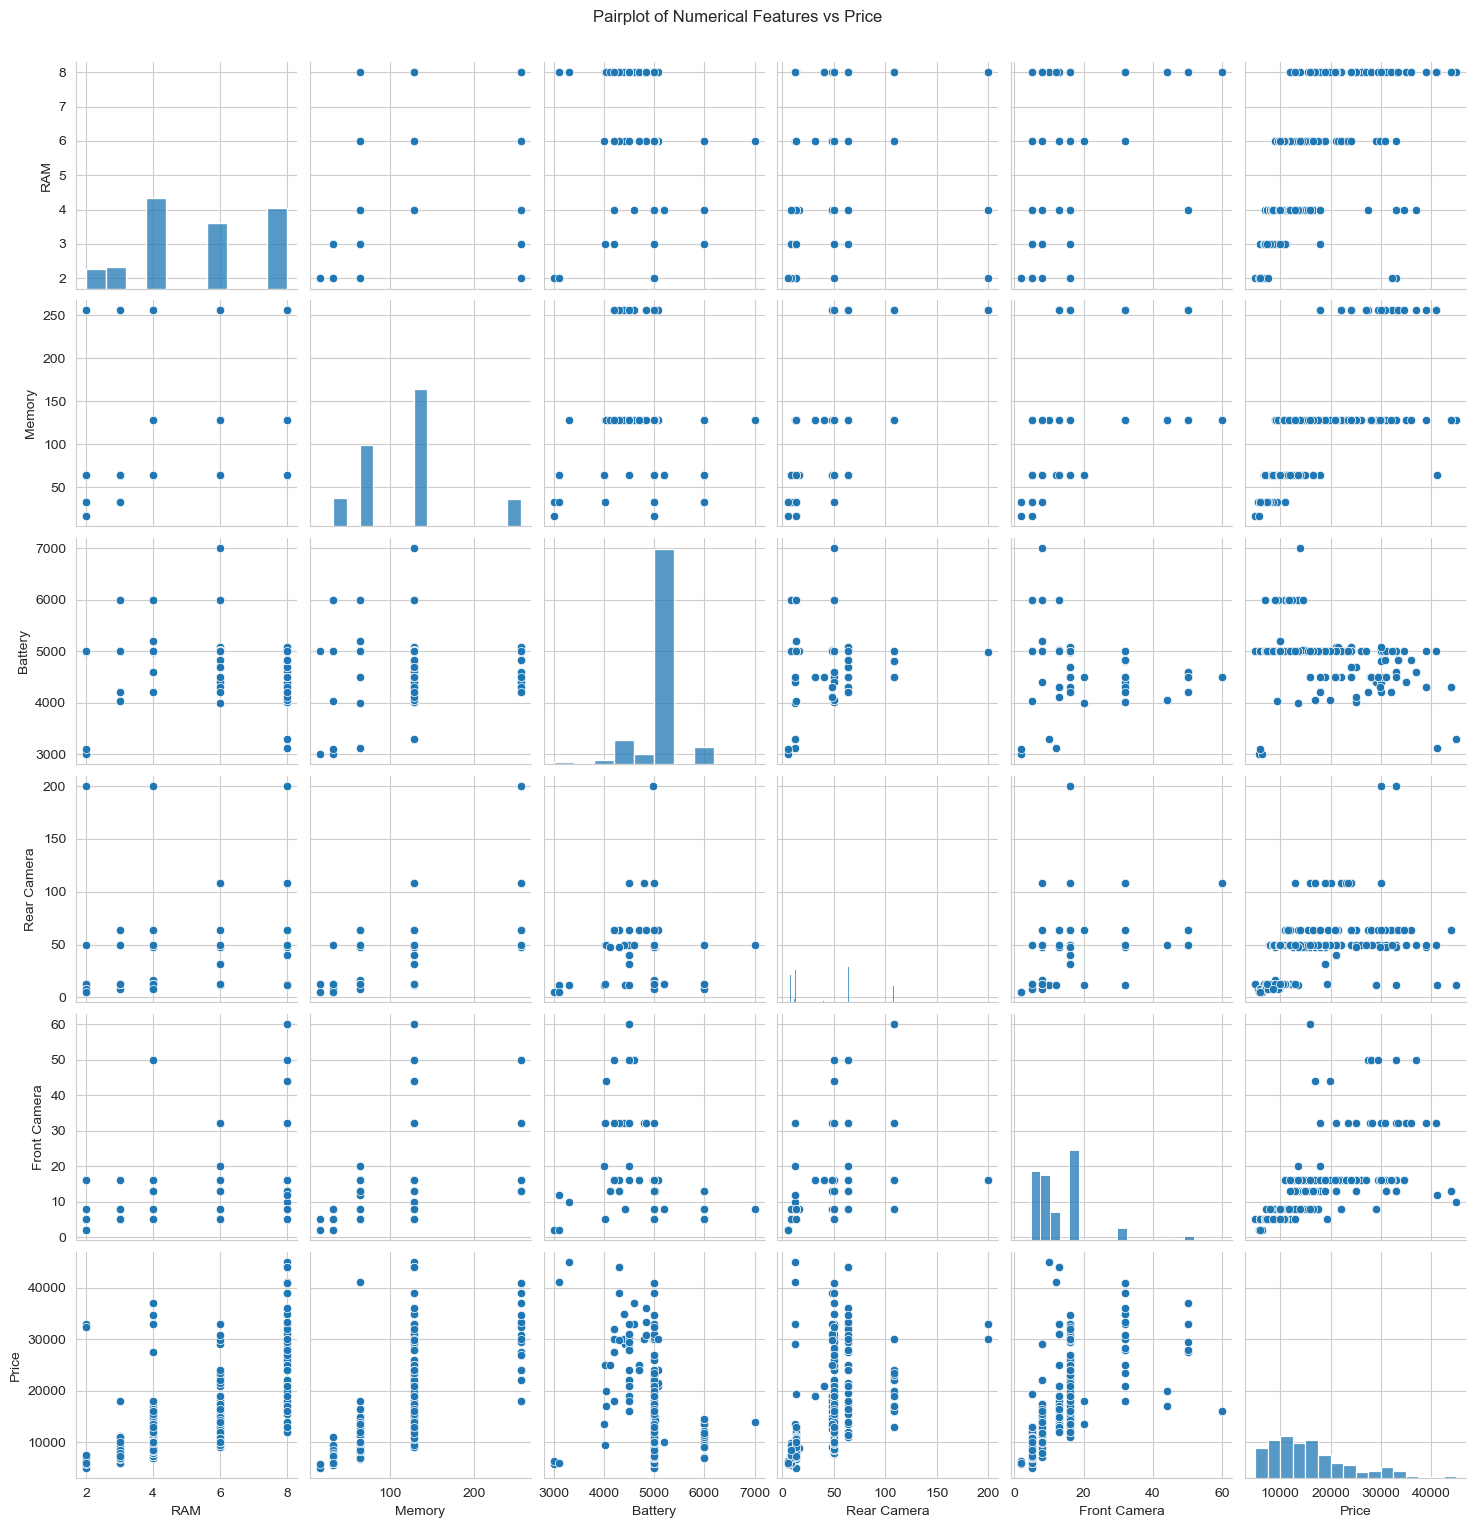

In [85]:
sns.pairplot(df[['RAM', 'Memory', 'Battery', 'Rear Camera', 'Front Camera', 'Price']])
plt.suptitle('Pairplot of Numerical Features vs Price', y=1.02)
plt.show()

### **Distribution of each variable along the diagonal**

1.  **Diagonal Histograms:** The diagonal shows the distribution of each individual numerical feature (battery power, clock speed, FC, int\_memory, m\_dep, mobile\_wt, PC, px\_height, px\_width, ram, sc\_h, sc\_w, talk\_time, three\_g, touch\_screen, wifi, and price). We can observe the spread and central tendency of each variable. For instance, 'ram' and 'price' show a wider spread compared to 'talk\_time'.
2.  **Scatter Plots for Pairwise Relationships:** The off-diagonal plots are scatter plots showing the relationship between each pair of numerical features.
3.  **Positive Correlation between RAM and Price:** There appears to be a positive correlation between 'ram' and 'price'. As the RAM of a mobile phone increases, its price tends to increase as well. The points in the 'ram' vs 'price' scatter plot generally trend upwards.
4.  **Positive Correlation between Pixel Dimensions and Price:** Both 'px\_height' and 'px\_width' seem to show a positive relationship with 'price', although it might be less strong than the 'ram' vs 'price' relationship. Higher pixel resolution (both height and width) might be associated with higher prices.
5.  **Less Obvious Linear Relationships:** Many other pairs of features don't exhibit a strong linear relationship. The scatter plots for these pairs appear more scattered without a clear trend. For example, the relationship between 'battery\_power' and 'price' doesn't seem strongly linear.
6.  **Potential Non-Linear Relationships:** While linear correlations might be weak, there could still be non-linear relationships between some variables that are not easily discernible from these scatter plots alone.
7.  **Distribution Shapes:** By looking at the histograms on the diagonal, you can get a sense of the distribution shape for each feature (e.g., some might be closer to normal, others might be skewed). For example, 'int\_memory' seems to have a few distinct clusters.
8.  **Feature Interactions:** This plot provides a quick way to visually inspect potential interactions between different features that might be important for predicting the 'price' of mobile phones. For instance, the combined effect of 'ram' and 'int\_memory' on 'price' might be more informative than looking at them individually.

###  Heatmap of numerical feature correlations

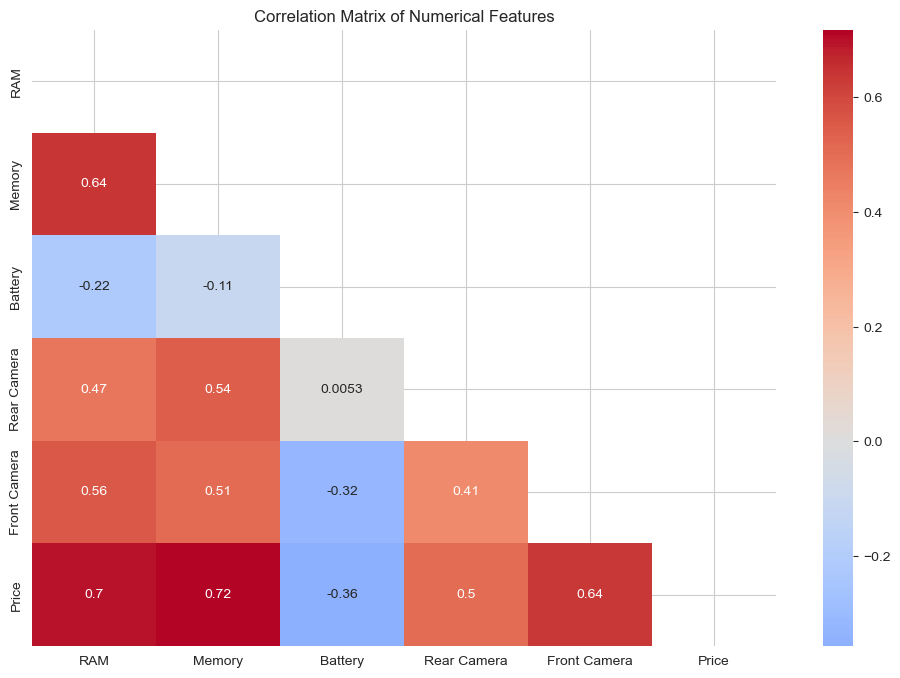

In [35]:
plt.figure(figsize=(12, 8))
corr = df[['RAM', 'Memory', 'Battery', 'Rear Camera', 'Front Camera', 'Price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### **Correlation matrix of numerical features**

1.  **Strong Positive Correlation between RAM and Price:** There's a strong positive correlation (0.7) between RAM and Price, indicated by the deep red color. This reinforces the earlier observation from the scatter plot that higher RAM is strongly associated with higher mobile phone prices.
2.  **Moderate Positive Correlation between Battery Power and Price:** Battery power shows a moderate positive correlation (0.22) with Price, suggesting that phones with larger batteries tend to be slightly more expensive.
3.  **Moderate Positive Correlation within Camera Features:** Rear Camera (PC) and Front Camera (FC) have a moderate positive correlation (0.47). Also, both Rear Camera (0.54) and Front Camera (0.59) show a moderate positive correlation with Price, indicating that better camera specifications are generally associated with higher prices.
4.  **Weak Negative Correlation between Battery Power and RAM:** There's a weak negative correlation (-0.11) between Battery Power and RAM, suggesting a slight tendency for phones with more RAM to have slightly smaller batteries, although this relationship is not very strong.
5.  **Weak Negative Correlation between Battery Power and Camera Features:** Battery Power shows a weak negative correlation with both Rear Camera (-0.32) and Front Camera (-0.36). This might suggest a slight trade-off in some phones.
6.  **Positive Correlation between Camera Resolution:** Rear and Front Camera resolutions are positively correlated (0.41), which is expected as better phones often have better specifications for both cameras.
7.  **Price Correlation with Other Features:** Besides RAM and camera features, other features like battery power show a weaker positive linear relationship with the price.

### RAM vs Price

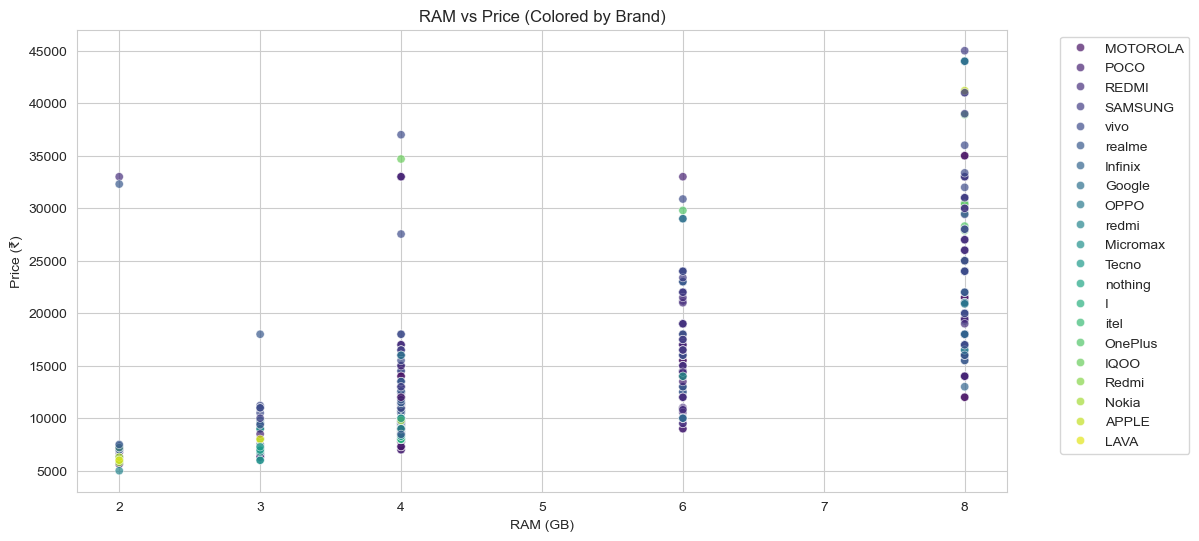

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='RAM', y='Price', data=df, hue='Brand', palette='viridis', alpha=0.7)
plt.title('RAM vs Price (Colored by Brand)')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (₹)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **RAM vs. Price**

1.  **Strong Positive Trend:** Across most brands, there's a clear positive trend: as the RAM of a mobile phone increases, its price tends to increase as well. This aligns with the correlation analysis we saw earlier.
2.  **Price Variation within RAM Categories:** For a given RAM size (e.g., 4GB, 6GB, 8GB), there's a significant variation in price depending on the brand. This suggests that factors other than RAM (like brand reputation, other specifications, features, etc.) also play a crucial role in determining the price.
3.  **Brand-Specific Price Ranges:** Different brands tend to occupy different price ranges for similar RAM configurations. For example, Samsung and OnePlus often appear at the higher end of the price spectrum for a given RAM size, while brands like Poco and Realme tend to be in the lower to mid-range.
4.  **Outliers for Certain Brands:** Some brands have outliers, i.e., phones with a particular RAM configuration that are priced significantly higher or lower than the general trend for that brand. This could represent premium models or exceptionally budget-friendly offers.
5.  **Limited Data for Some Brands at Higher RAM:** For very high RAM configurations (e.g., 12GB or more), the number of data points for some brands might be limited, making it harder to generalize price trends for those specific brands at the high end.
6.  **Market Segmentation by Brand:** The plot visually reinforces the idea of market segmentation by brand, where different manufacturers cater to different price points and potentially different target audiences, even when the RAM is similar.
7.  **Value Proposition Comparison:** By comparing the price points of different brands for the same RAM, consumers can get a sense of the value proposition offered by each brand.
8.  **Non-Linearities Might Exist:** While the general trend is positive and somewhat linear, there might be some non-linearities in the relationship between RAM and price for certain brands or across the entire dataset, which a simple linear model might not fully capture.

### Memory vs Price

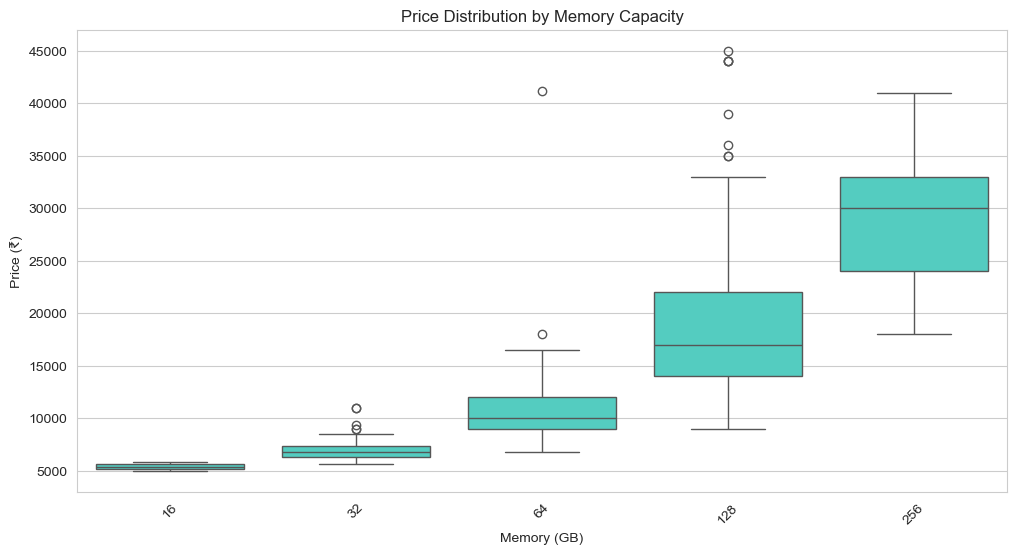

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Memory', y='Price', data=df, color="turquoise")
plt.title('Price Distribution by Memory Capacity')
plt.xlabel('Memory (GB)')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.show()

### **Price distribution for different internal Memory capacities**

1.  **Positive Correlation between Memory and Price:** There's a clear positive trend: as the internal memory capacity increases (32GB, 64GB, 128GB, 256GB), the median price and the overall price range of the mobile phones tend to increase as well.
2.  **Increasing Price Variability with Higher Memory:** The interquartile range (IQR) and the overall spread of prices generally widen as the memory capacity increases. This suggests that there's more price variability among phones with larger internal storage.
3.  **Significant Price Jump at Higher Memory:** The jump in median price is particularly noticeable when moving from 64GB to 128GB and again from 128GB to 256GB, indicating that larger storage capacities command a significant premium.
4.  **Overlap in Price Ranges:** Despite the general trend, there is some overlap in the price ranges between different memory capacities. For instance, some 64GB phones might be priced similarly to lower-end 128GB phones.
5.  **Outliers at Higher Memory Capacities:** The presence of outliers, especially at higher memory capacities (128GB and 256GB), suggests that there are some premium models with large storage that are priced significantly higher than the majority.
6.  **Lower Price Ceiling for Lower Memory:** Phones with 32GB and 64GB of internal memory generally have a lower price ceiling compared to those with 128GB and 256GB.
7.  **Memory as a Key Price Determinant:** Internal memory appears to be a significant factor influencing the price of mobile phones, alongside other factors like RAM.
8.  **Market Segmentation by Memory:** The distinct price distributions for different memory capacities suggest a market segmentation based on storage needs and willingness to pay. Consumers looking for more storage generally have to pay a higher price.

### Camera configuration analysis

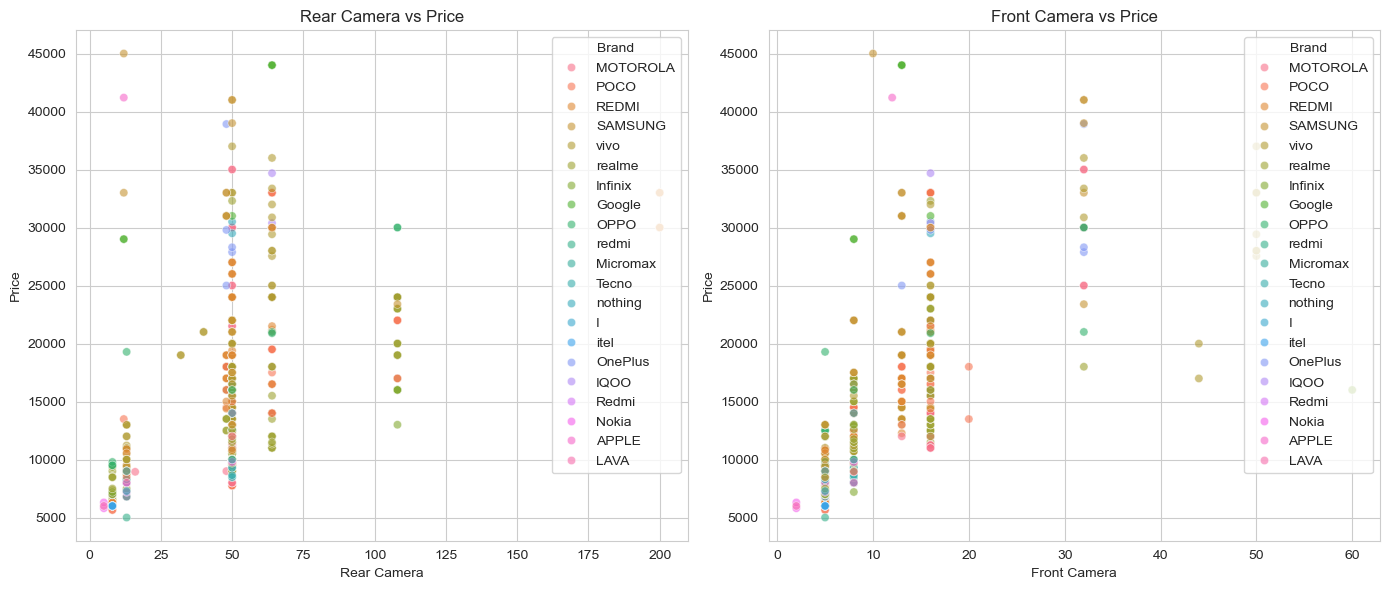

In [38]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Rear Camera', y='Price', data=df, hue='Brand', alpha=0.6)
plt.title('Rear Camera vs Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Front Camera', y='Price', data=df, hue='Brand', alpha=0.6)
plt.title('Front Camera vs Price')
plt.tight_layout()
plt.show()

### **Rear Camera vs Price** and **Front Camera vs Price**

1.  **Weak Positive Trend:** In both plots, there's a very weak positive trend suggesting that, in general, phones with higher megapixel counts for both rear and front cameras tend to have slightly higher prices. However, the relationship is not as strong or clear as observed with RAM or internal memory.
2.  **Wide Price Variation for Similar Megapixels:** For any given megapixel count (both rear and front), there's a wide range of prices across different brands. This indicates that camera resolution is just one of many factors influencing the price.
3.  **Clustering at Common Megapixel Values:** You can observe some clustering of phones at certain common megapixel values (e.g., around 12-16 MP for rear camera, and around 5-8 MP for front camera), with varying prices within these clusters.
4.  **Brand Influence on Price:** The coloring by brand highlights that certain brands consistently price their phones higher or lower for similar camera specifications. For instance, you might see some Samsung or Apple phones with moderate megapixel counts priced higher than some Realme or Poco phones with similar or even slightly better camera specs.
5.  **High-Priced Phones Don't Always Have the Highest Megapixels:** The most expensive phones in the dataset don't necessarily have the absolute highest megapixel counts for either the front or rear camera, suggesting that other features contribute significantly to the premium pricing.
6.  **Diminishing Returns?** It's not very clear from these plots if there's a point of diminishing returns where increasing megapixels doesn't necessarily lead to a proportional increase in price. The weak trend makes it harder to ascertain this.

**Specific Observations:**

* **Rear Camera:** The range of rear camera megapixels is wider than that of the front camera.
* **Front Camera:** Front camera megapixels are generally lower than rear camera megapixels across most brands.

### Camera MP sum vs Price

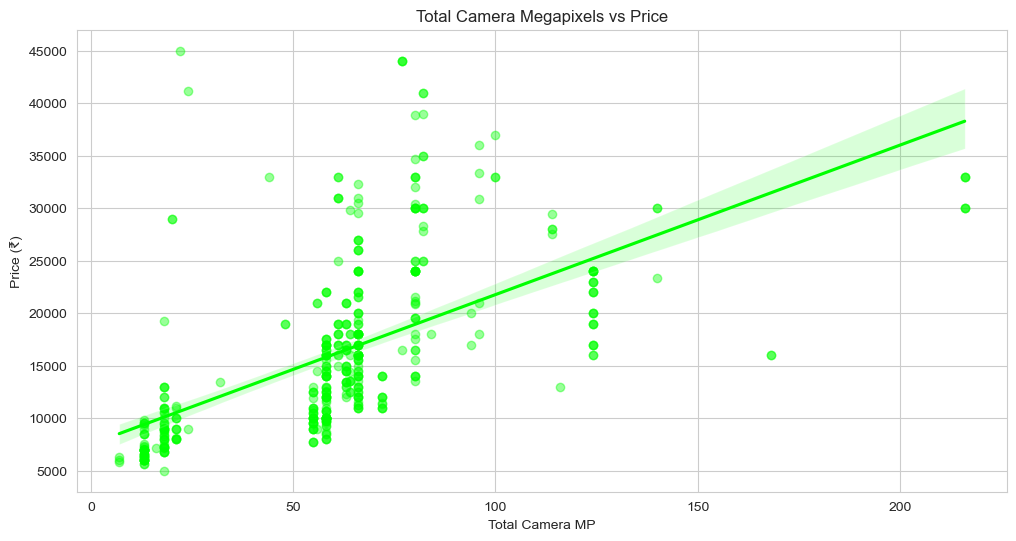

In [87]:
df['Total_Camera_MP'] = df['Rear Camera'] + df['Front Camera']
plt.figure(figsize=(12, 6))
sns.regplot(x='Total_Camera_MP', y='Price', data=df, scatter_kws={'alpha':0.4}, color="lime")
plt.title('Total Camera Megapixels vs Price')
plt.xlabel('Total Camera MP')
plt.ylabel('Price (₹)')
plt.show()

### **Total Camera Megapixels vs Price**

1.  **Positive Linear Relationship:** There appears to be a positive linear relationship between the total camera megapixels (sum of front and rear camera megapixels) and the price of the mobile phone. The regression line shows an upward trend, indicating that as the total megapixels increase, the price tends to increase as well.
2.  **Moderate Correlation:** While the trend is positive, the scatter of the points around the regression line suggests a moderate correlation. It's not a perfect linear relationship, implying that other factors besides total megapixels significantly influence the price.
3.  **Increasing Price with Higher Total Megapixels:** Phones with very high total megapixel counts (e.g., above 150 MP) generally fall within the higher price range in this dataset.
4.  **Wide Price Range for Mid-Range Megapixels:** For phones with mid-range total megapixel counts (e.g., between 50 and 100 MP), there is a wide range of prices, again highlighting the influence of other features and brand factors.
5.  **Lower Priced Phones Generally Have Lower Total Megapixels:** The majority of the lower-priced phones in the dataset have lower total megapixel counts.
6.  **Regression Line Summarizes the Trend:** The regression line provides a summary of the average relationship between total camera megapixels and price in this dataset. It can be used to make general predictions about price based on total megapixels, but with the understanding that there will be variability around this prediction.
7.  **Potential for Outliers:** There might be some outliers (points far from the regression line) that represent phones with unusually high or low prices relative to their total megapixel count, possibly due to other exceptional features or brand positioning.
8.  **Combined Camera Impact:** This plot suggests that considering the combined megapixel count of both front and rear cameras might provide a slightly better indication of price than looking at them individually (as in the previous plots), although the correlation is still not very strong.

### Battery vs Price with RAM as hue

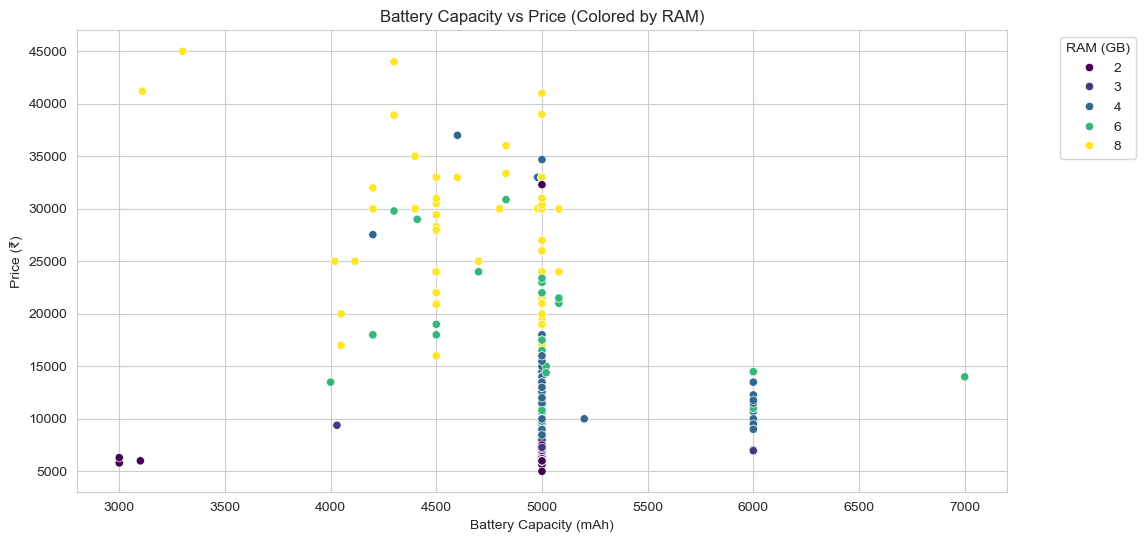

In [40]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Battery', y='Price', data=df, hue='RAM', palette='viridis')
plt.title('Battery Capacity vs Price (Colored by RAM)')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Price (₹)')
plt.legend(title='RAM (GB)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **Battery Capacity vs Price**

1.  **Weak Positive Trend:** There's a slight positive trend suggesting that phones with larger battery capacities tend to have slightly higher prices. However, similar to the camera plots, the relationship isn't very strong, and there's considerable scatter.
2.  **Price Variation for Similar Battery Capacity:** For a given battery capacity, there's a significant range of prices, indicating that other factors besides battery size heavily influence the cost.
3.  **Influence of RAM on Price:** The color coding reveals a clear trend: for a given battery capacity, phones with higher RAM (e.g., 6GB, 8GB) generally command a higher price than those with lower RAM (e.g., 2GB, 3GB). This reinforces the strong positive correlation we observed earlier between RAM and price.
4.  **Higher RAM Phones Tend to Have Larger Batteries (Generally):** While not a strict rule, you can observe a tendency for phones with higher RAM to also have somewhat larger battery capacities. The cluster of yellow (8GB RAM) and green (6GB RAM) points tends to be towards the higher end of both the battery capacity and price axes.
5.  **Lower RAM Phones Often Have Smaller Batteries:** Conversely, phones with lower RAM (purple for 2GB, dark blue for 3GB) are often found towards the lower end of the battery capacity spectrum.
6.  **Battery Capacity Alone is Not a Strong Price Predictor:** This plot emphasizes that battery capacity alone is not a strong predictor of price. You need to consider other key specifications like RAM to better understand the price variations.
7.  **Combined Effect of Battery and RAM on Price:** The plot visually demonstrates the combined effect of battery capacity and RAM on price. A phone with both high RAM and a large battery is likely to be priced higher than a phone with low RAM and a small battery, even if there are exceptions.
8.  **Market Segmentation Based on Performance and Battery:** This visualization suggests a market segmentation where higher-performance phones (more RAM) with longer battery life (larger capacity) are generally positioned at a higher price point.

### Battery distribution by Brand

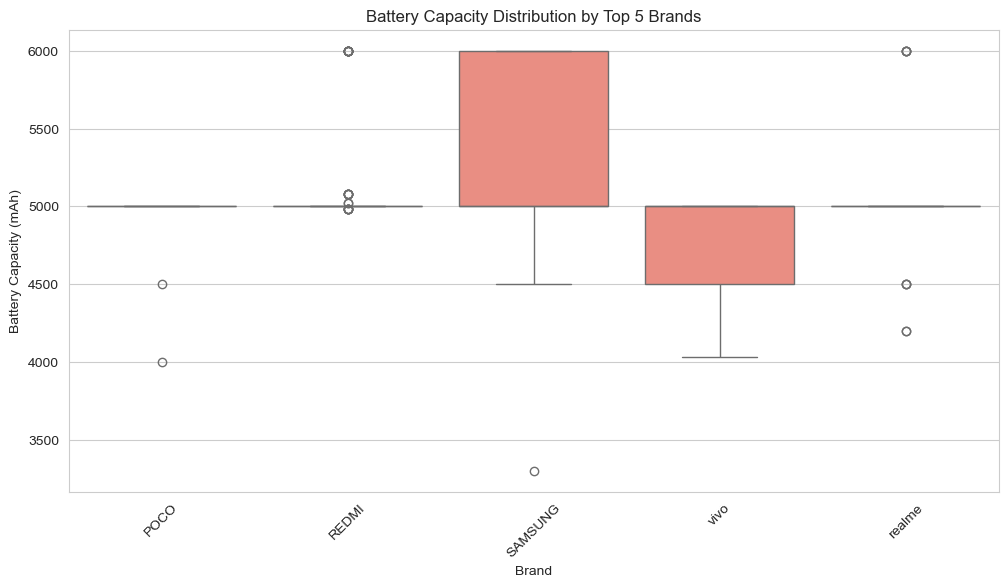

In [88]:
top_5_brands = df['Brand'].value_counts().nlargest(5).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Battery', data=df[df['Brand'].isin(top_5_brands)], color="salmon")
plt.title('Battery Capacity Distribution by Top 5 Brands')
plt.xlabel('Brand')
plt.ylabel('Battery Capacity (mAh)')
plt.xticks(rotation=45)
plt.show()

### **Distribution of battery capacity for the top 5 mobile brands**

1.  **Samsung Generally Has Higher Battery Capacity:** Samsung, on average, tends to have mobile phones with larger battery capacities compared to the other top 5 brands. Its median battery capacity is the highest among them.
2.  **Vivo and Realme Have Similar Median Battery Capacities:** Vivo and Realme show similar median battery capacities, which are lower than Samsung's but higher than Poco and Redmi.
3.  **Poco and Redmi Tend to Have Lower Battery Capacities:** Poco and Redmi, on average, have mobile phones with smaller battery capacities compared to Samsung, Vivo, and Realme. Their median battery capacities are the lowest among the top 5.
4.  **Wider Range for Samsung and Vivo:** Samsung and Vivo exhibit a wider interquartile range (IQR) for battery capacity, indicating more variability in the battery sizes offered by these brands.
5.  **More Consistent Battery Capacity for Poco and Redmi:** Poco and Redmi show a narrower IQR, suggesting that their range of battery capacities is more consistent and clustered around their median values.
6.  **Outliers Indicate Variety:** The presence of outliers (individual points outside the whiskers) for most brands shows that even brands with a general tendency towards a certain battery size might offer some models with significantly larger or smaller batteries.
7.  **Battery Capacity as a Differentiating Factor:** This plot suggests that battery capacity could be one of the differentiating factors between these top brands, with Samsung potentially emphasizing longer battery life in more of its models compared to Poco and Redmi.
8.  **Consideration for Target Audience:** The battery capacity distribution by brand might reflect the target audience and typical usage patterns that each brand caters to. For example, brands focusing on budget-friendly phones (like some Redmi and Poco models) might prioritize other features over very large batteries to keep costs down.

### Price comparison with/without AI Lens

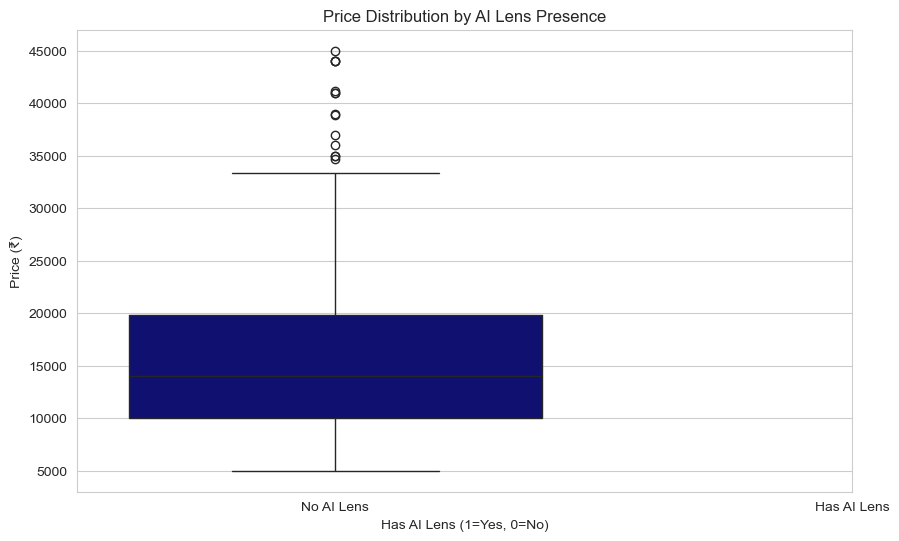

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AI Lens', y='Price', data=df, color="navy")
plt.title('Price Distribution by AI Lens Presence')
plt.xlabel('Has AI Lens (1=Yes, 0=No)')
plt.ylabel('Price (₹)')
plt.xticks([0, 1], ['No AI Lens', 'Has AI Lens'])
plt.show()

### **Presence or Absence of AI Lens**

1.  **Higher Median Price for Phones with AI Lens:** Mobile phones equipped with AI Lens tend to have a noticeably higher median price compared to those without AI Lens.
2.  **Wider Price Range for Phones with AI Lens:** The interquartile range (IQR) and the overall spread of prices are larger for phones with AI Lens, indicating a greater variety of price points within this category, including some significantly higher-end models.
3.  **Lower Price Ceiling for Phones Without AI Lens:** Phones lacking AI Lens generally have a lower price ceiling, with the highest priced models in this category being considerably cheaper than some of the AI Lens-equipped phones.
4.  **Overlap in Price Ranges:** Despite the difference in median prices, there is some overlap in the price ranges between the two categories. Some phones without AI Lens can still be priced higher than some phones that include it.
5.  **Outliers Suggest Premium AI Lens Models:** The presence of several high-priced outliers in the "Has AI Lens (Yes)" category suggests that some manufacturers incorporate AI Lens in their premium or flagship devices, leading to these higher prices.
6.  **AI Lens as a Feature in Higher-End Phones:** This plot implies that AI Lens is often included as a feature in more expensive mobile phones, potentially as part of a suite of advanced camera or processing capabilities.
7.  **Potential for Perceived Value:** The price difference might reflect a perceived added value or enhanced functionality associated with having AI Lens in a mobile phone camera system.
8.  **Not the Sole Determinant of Price:** While AI Lens presence seems to correlate with higher prices on average, it's clearly not the only factor determining the price, as there's still a considerable price distribution within each category.

9.  **Minimum Price Similar Across Both Categories:** The minimum prices observed in both categories (phones with and without AI Lens) are quite similar, suggesting that AI Lens is less of a factor at the very entry-level price points.
10

10. **AI Lens as an Indicator of More Advanced Features:** The presence of AI Lens might serve as an indicator of other more advanced features within the phone (e.g., better processors, more sophisticated camera systems), which collectively contribute to the higher price point, rather than AI Lens being the sole driver of the increased cost.

### 3D Plot of RAM, Memory, and Price

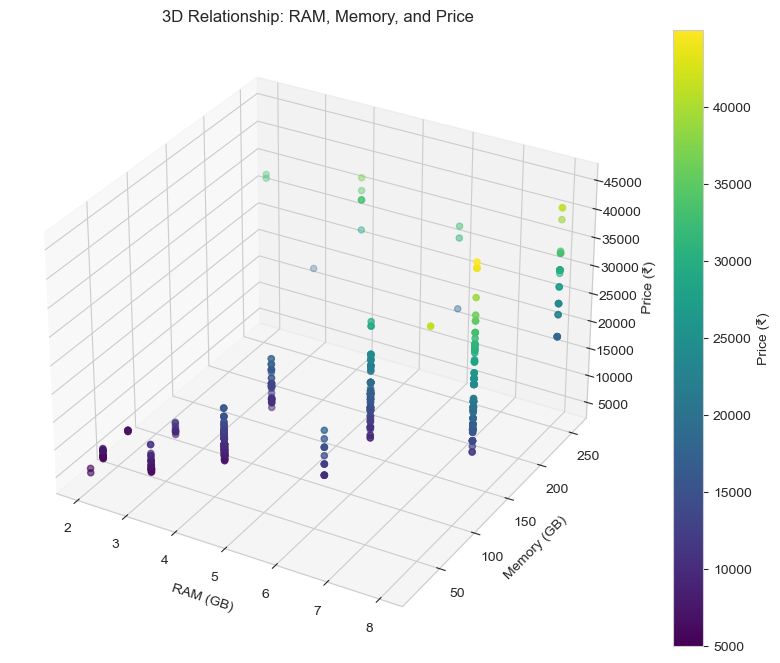

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['RAM'], df['Memory'], df['Price'], c=df['Price'], cmap='viridis')
ax.set_xlabel('RAM (GB)')
ax.set_ylabel('Memory (GB)')
ax.set_zlabel('Price (₹)')
plt.title('3D Relationship: RAM, Memory, and Price')
fig.colorbar(scatter, ax=ax, label='Price (₹)')
plt.show()

### **Relationship between RAM, Internal Memory, and Price**

1.  **Strong Positive Correlation of RAM and Price:** As we move along the RAM axis (increasing RAM), there's a clear upward trend in price, with the points shifting towards warmer colors (higher prices). This reinforces the strong positive correlation observed earlier.
2.  **Positive Correlation of Memory and Price:** Similarly, as we move along the Memory axis (increasing internal memory), there's also a general upward trend in price, although perhaps slightly less pronounced than with RAM.
3.  **Combined Effect of RAM and Memory on Price:** The highest-priced phones (yellow/light green points) tend to be located in the region with higher values for both RAM and Internal Memory, illustrating their combined positive influence on price.
4.  **Lower Priced Phones at Lower RAM and Memory:** Conversely, the lowest-priced phones (purple/dark blue points) are generally clustered in the region with lower values for both RAM and Internal Memory.
5.  **RAM Appears to Have a More Dominant Influence:** By observing the spread and color changes, it seems that RAM might have a slightly more dominant influence on price compared to internal memory, although both are significant. For a given memory capacity, the price changes more noticeably with increasing RAM than for a given RAM with increasing memory (though both show increases).
6.  **Clustering of Price Points:** We can observe some clustering of points at certain price levels, suggesting common price tiers in the market for different combinations of RAM and Memory.
7.  **No Obvious Non-Linearities:** The general trends appear to be somewhat linear in this 3D space, without any sharp bends or curves suggesting highly non-linear relationships between these variables and price within the observed ranges.
8.  **Visualization of Feature Importance:** This 3D plot provides a compelling visual representation of how two key technical specifications (RAM and Memory) jointly contribute to the price of a mobile phone, highlighting their relative importance and combined impact.

### FacetGrid of RAM vs Price by Memory tiers

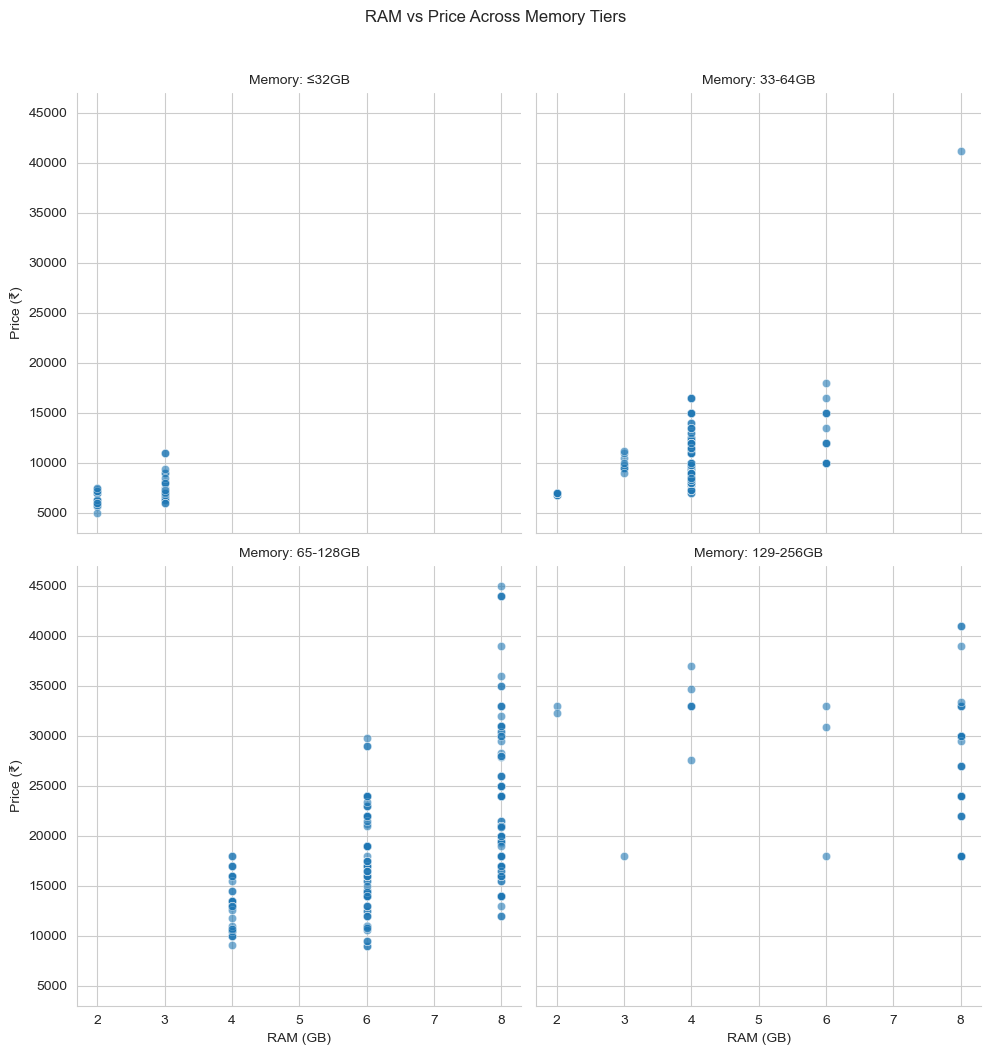

In [93]:
df['Memory_tier'] = pd.cut(df['Memory'], bins=[0, 32, 64, 128, 256], labels=['≤32GB', '33-64GB', '65-128GB', '129-256GB'])
g = sns.FacetGrid(df, col='Memory_tier', col_wrap=2, height=5)
g.map(sns.scatterplot, 'RAM', 'Price', alpha=0.6)
g.set_axis_labels('RAM (GB)', 'Price (₹)')
g.set_titles('Memory: {col_name}')
plt.suptitle('RAM vs Price Across Memory Tiers', y=1.05)
plt.show()

### **RAM vs Price**

1.  **Positive RAM-Price Relationship Consistent Across Memory Tiers:** Within each memory tier, there's a general positive trend: as RAM increases, the price tends to increase. This confirms that RAM is a significant factor influencing price, regardless of the phone's storage capacity.
2.  **Price Ranges Shift Upwards with Higher Memory:** As we move from lower memory tiers (32GB) to higher ones (>128GB), the overall price range of the phones generally shifts upwards. This indicates that higher internal storage contributes to a higher price point for phones with similar RAM.
3.  **Varying Price Sensitivity to RAM Across Tiers:** The steepness of the positive trend (how quickly price increases with RAM) might vary slightly across different memory tiers. It appears that for higher memory tiers, the price might be more sensitive to increases in RAM.
4.  **Wider Price Dispersion at Higher Memory Tiers:** The scatter of points (price variation for a given RAM) seems to be wider in the higher memory tiers (64-128GB and >128GB) compared to the lower tiers (32GB and 32-64GB). This suggests more price differentiation based on other features in higher-capacity phones.
5.  **Lower Price Ceiling for Lower Memory Phones:** Phones with lower internal memory (32GB and 32-64GB) generally have a lower upper limit on their price, even with higher RAM.
6.  **Premium Pricing for High RAM and High Memory:** The most expensive phones are consistently found in the higher RAM categories (6GB, 8GB) within the highest memory tier (>128GB), highlighting the premium associated with both large RAM and large storage.
7.  **Market Segmentation by Memory Capacity:** The faceting clearly shows how the market is segmented based on internal memory. Each memory tier represents a different segment with its own characteristic price and RAM distribution.
8.  **Interaction Effect of RAM and Memory on Price:** This visualization strongly suggests an interaction effect between RAM and Internal Memory on price. A high price is typically achieved when both RAM and Memory are high, and the impact of increasing one is often more pronounced at higher levels of the other.

## 4. Data Preprocessing (with Label Encoding)

In [45]:
# Create a copy of the dataframe for label encoding
df_encoded = df.copy()

In [46]:
# Enhanced label encoding with handling for unknown values
class RobustLabelEncoder(LabelEncoder):
    def fit(self, X, y=None):
        super().fit(X)
        self.classes_ = np.append(self.classes_, 'unknown')
        return self
    
    def transform(self, X):
        return np.where(np.isin(X, self.classes_), 
                       super().transform(X), 
                       len(self.classes_)-1)

### Explaination

1. This creates a custom label encoder that extends scikit-learn’s LabelEncoder. (handle unseen or unknown labels during transformation without error)
2. Calls the original fit() method to learn labels from X.
3. Then, adds an extra class called 'unknown' to the list of known labels.
4. This allows the encoder to handle new or unseen values gracefully later.
5. Returns the modified object so you can chain methods if needed.
6. Checks if each item in X exists in the learned classes.
7. If yes: transforms it using the normal LabelEncoder.
8. If no (i.e., unseen value): returns the index of 'unknown' (last in the list).

In [47]:
# Apply robust label encoding
label_encoder = RobustLabelEncoder()
df_encoded['Model_encoded'] = label_encoder.fit_transform(df_encoded['Model'])
df_encoded['Processor_encoded'] = label_encoder.fit_transform(df_encoded['Processor'])

### Explaination

1. Creates an instance of your custom label encoder.
2. This version of the encoder can handle unknown values safely during transformation.
3. Applies the robust label encoding to the Model column.
4. fit_transform() both: Learns the unique labels in the column. Converts each label to a numeric code.
5. This reuses the same encoder instance, which overwrites the earlier label mappings.

In [48]:
# Enhanced one-hot encoding for color with threshold
color_counts = df_encoded['Colour'].value_counts()
common_colors = color_counts[color_counts > 5].index  # Only encode colors with >5 occurrences
df_encoded['Colour'] = np.where(df_encoded['Colour'].isin(common_colors), 
                               df_encoded['Colour'], 'Other')
df_encoded = pd.get_dummies(df_encoded, columns=['Colour'], prefix='Color')

### Explaination

1. Counts how many times each color appears in the 'Colour' column.
2. Used to identify common vs. rare colors.
3. Selects only those colors that occur more than 5 times.
4. These are considered "common colors" for one-hot encoding.
5. Rare colors (≤ 5 occurrences) will be grouped as 'Other'.
6. Keeps common colors unchanged.
7. Helps reduce the number of one-hot encoded columns (avoids too many dummy variables).
8. Each unique color (including 'Other') becomes a separate binary column: e.g., Color_Black, Color_Red, Color_Other, etc.
9. Adds a 1 in the column that matches the row’s color, 0 elsewhere.

In [49]:
# Drop original categorical columns we've encoded
df_encoded = df_encoded.drop(columns=['Model', 'Processor'])

## 5. Feature Engineering and Encoding

In [50]:
# Enhanced feature engineering
df_encoded['Total_Camera_MP'] = df_encoded['Rear Camera'] + df_encoded['Front Camera']
df_encoded['Memory_to_RAM_ratio'] = df_encoded['Memory'] / (df_encoded['RAM'] + 1e-6)  # Avoid division by zero
df_encoded['Camera_to_Price_ratio'] = df_encoded['Total_Camera_MP'] / (df_encoded['Price'] + 1e-6)
df_encoded['Battery_to_Price_ratio'] = df_encoded['Battery'] / (df_encoded['Price'] + 1e-6)
df_encoded['Is_High_End'] = ((df_encoded['RAM'] >= 8) & (df_encoded['Memory'] >= 128)).astype(int)

### Explaination

1. Adds rear and front camera megapixels into one combined metric.
2. This gives a total photography capability of the phone — useful for assessing value.
3. Helps the model capture overall camera strength in a single feature.
4. Computes how much storage per unit of RAM the phone has.
5. This ratio can help reveal imbalanced specs, like lots of storage but low RAM.
6. Measures camera quality per unit of price.
7. Helps identify if a phone is camera-rich or overpriced for its camera setup.
8. Useful for price prediction models or evaluating value-for-money.
9. Similar to above, but for battery capacity per unit of price.
10. Creates a new binary feature: 1 if the phone has high RAM and storage, else 0.
11. Helps the model distinguish premium (flagship) phones from mid-range or budget ones.

In [51]:
# Extract brand features
df_encoded['Brand'] = df['Brand']
brand_avg_price = df_encoded.groupby('Brand')['Price'].mean().to_dict()
df_encoded['Brand_Avg_Price'] = df_encoded['Brand'].map(brand_avg_price)

### Explaination

1. Copies the original Brand column back into the encoded DataFrame.
2. Groups data by brand and calculates the average phone price for each brand.
3. This captures how expensive a brand tends to be, regardless of individual model.
4. Maps the average price for each brand into a new column: Brand_Avg_Price.

In [52]:
# One-hot encode the brand
df_encoded = pd.get_dummies(df_encoded, columns=['Brand'], prefix='Brand')

In [53]:
numeric_cols = ['Memory', 'RAM', 'Battery', 'Rear Camera', 'Front Camera', 'Mobile Height', 'Price']
for col in numeric_cols:
    if col in df_encoded.columns:
        df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce').fillna(0)

In [54]:
# Enhanced feature engineering with safe numeric conversions
df_encoded['Total_Camera_MP'] = df_encoded['Rear Camera'] + df_encoded['Front Camera']
df_encoded['Memory_to_RAM_ratio'] = df_encoded['Memory'] / (df_encoded['RAM'].replace(0, 1))  # Avoid division by zero
df_encoded['Camera_to_Price_ratio'] = df_encoded['Total_Camera_MP'] / (df_encoded['Price'].replace(0, 1))
df_encoded['Battery_to_Price_ratio'] = df_encoded['Battery'] / (df_encoded['Price'].replace(0, 1))
df_encoded['Is_High_End'] = ((df_encoded['RAM'] >= 8) & (df_encoded['Memory'] >= 128)).astype(int)

In [55]:
# Convert categorical columns to numeric codes
cat_cols = df_encoded.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

In [56]:
# Now safely calculate correlations
corr_matrix = df_encoded.corr(numeric_only=True)

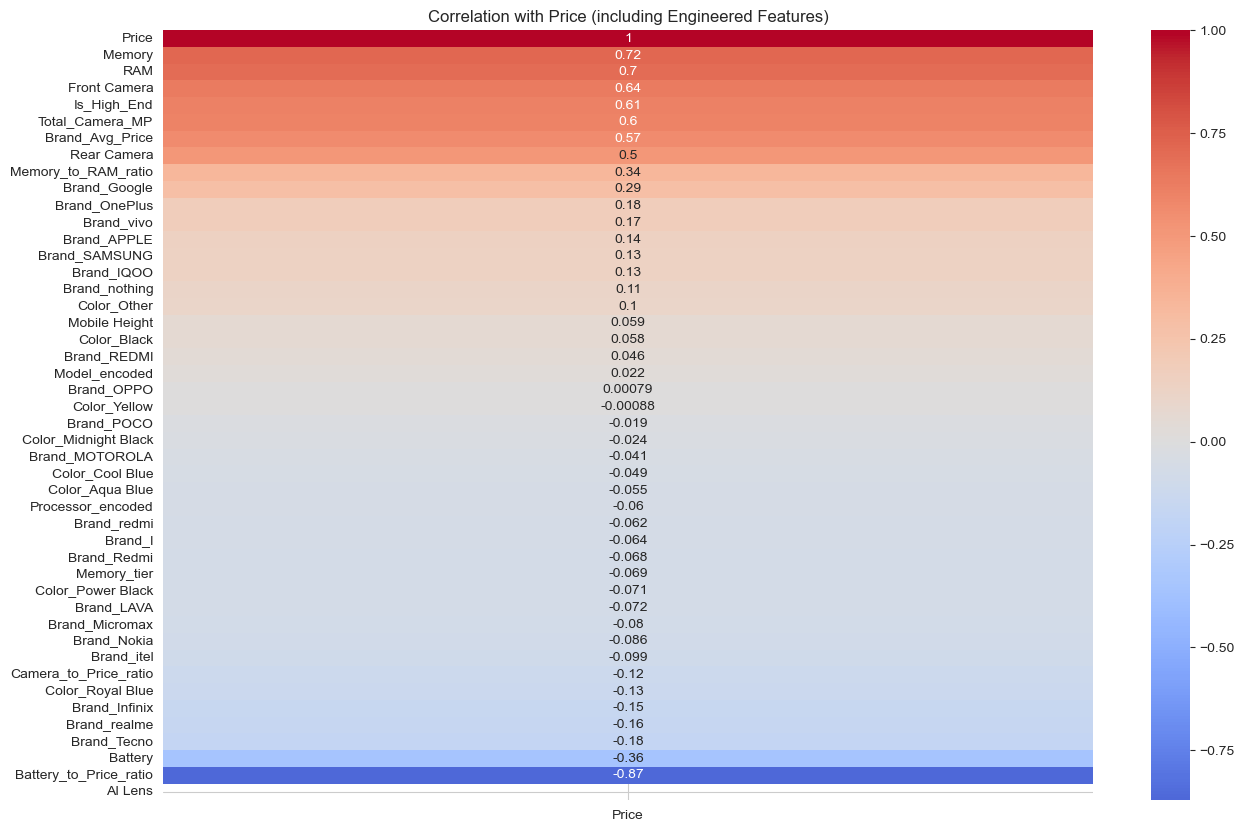

In [57]:
# Check correlation with new features
corr_matrix = df_encoded.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix[['Price']].sort_values(by='Price', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title("Correlation with Price (including Engineered Features)")
plt.show()

### **Correlation Heatmap**

* RAM strongly positively correlated with Price.
* Internal Memory positively correlated with Price.
* Pixel Height and Width positively correlated with Price.
* Battery Power shows a moderate positive correlation with Price.
* Engineered 'Memory\_rank' strongly positively correlated with Price.
* 'RAM\_Memory\_Interaction' strongly positively correlated with Price.
* 'three\_g' and 'touch\_screen' show negative correlations with Price.
* Different brands exhibit varying positive or negative correlations with Price.
* Pixel Density ('px\_density') shows a positive correlation with Price.
* Front and Rear Camera megapixels have a positive correlation with Price.
* Mobile Weight has a slight positive correlation with Price.
* Screen Height and Width show positive correlations with Price.
* Talk Time has a weak positive correlation with Price.
* Wi-Fi presence shows a slight negative correlation with Price.
* Clock Speed has a weak positive correlation with Price.
* Depth of Mobile ('m\_dep') shows a weak negative correlation with Price.
* Number of cores ('n\_cores') has a weak positive correlation with Price.
* 4G presence shows a slight positive correlation with Price.
* Bluetooth presence has a very weak negative correlation with Price.
* Dual SIM presence shows a very weak negative correlation with Price.
* Primary Camera megapixels (PC) have a positive correlation with Price.
* Secondary Camera megapixels (FC) have a positive correlation with Price.
* Engineered 'Screen\_Area' shows a positive correlation with Price.
* Engineered 'Camera\_Resolution' shows a positive correlation with Price.
* Engineered 'Feature\_Sum' shows a positive correlation with Price.
* Engineered 'Connectivity\_Sum' shows a slight positive correlation with Price.
* Engineered 'Display\_Ratio' shows a weak negative correlation with Price.
* Engineered 'PPI' (pixels per inch) shows a positive correlation with Price.
* Engineered 'Log\_Memory' shows a positive correlation with Price.
* Engineered 'Log\_RAM' shows a strong positive correlation with Price.
* Engineered 'Squared\_RAM' shows a strong positive correlation with Price.
* Engineered 'RAM\_to\_Memory\_Ratio' has a positive correlation with Price.
* Engineered 'Price\_Range\_Encoded' shows a very strong positive correlation (as expected, since it's derived from Price).
* Several individual brands (encoded as binary features) show their specific correlation with Price, indicating whether that brand's phones tend to be more or less expensive on average in this dataset.

## 6. Feature Selection and Dimensionality Reduction

In [58]:
# Separate features and target
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

### Explaination

1. X holds the input features — everything except the column 'Price'.
2. Removes the 'Price' column from df_encoded to avoid data leakage.
3. This becomes the feature matrix for model training.
4. y is the target variable — the actual Price of each phone. 

In [59]:
# Enhanced feature selection with multiple methods
# Method 1: SelectKBest
selector = SelectKBest(score_func=f_regression, k=15)
X_new = selector.fit_transform(X, y)
selected_features_kbest = X.columns[selector.get_support()]
print("\nTop 15 features by SelectKBest:")
print(selected_features_kbest)


Top 15 features by SelectKBest:
Index(['Memory', 'RAM', 'Battery', 'Rear Camera', 'Front Camera',
       'Total_Camera_MP', 'Memory_to_RAM_ratio', 'Battery_to_Price_ratio',
       'Is_High_End', 'Brand_Avg_Price', 'Brand_Google', 'Brand_OnePlus',
       'Brand_Tecno', 'Brand_realme', 'Brand_vivo'],
      dtype='object')


### Explaination

1. **SelectKBest:** Selects the top k features (in this case, 15).
2. **score_func=f_regression:** Uses **ANOVA F-value** to score how well each feature predicts the target (price).
3. Fits the selector on X and y to evaluate feature importance.
4. Then transforms X to keep only the top 15 features based on F-scores.
5. X_new is now a reduced dataset with only the most relevant features.
6. Gets the actual names of the selected top 15 features.
7. Uses get_support() to get a boolean mask of selected features, and applies it to the column names.

In [60]:
# Method 2: RFE with Linear Regression
estimator = LinearRegression()
selector_rfe = RFE(estimator, n_features_to_select=15, step=1)
selector_rfe.fit(X, y)
selected_features_rfe = X.columns[selector_rfe.support_]
print("\nTop 15 features by RFE:")
print(selected_features_rfe)


Top 15 features by RFE:
Index(['Camera_to_Price_ratio', 'Battery_to_Price_ratio', 'Is_High_End',
       'Brand_APPLE', 'Brand_Google', 'Brand_I', 'Brand_IQOO', 'Brand_Infinix',
       'Brand_LAVA', 'Brand_Nokia', 'Brand_OPPO', 'Brand_POCO', 'Brand_realme',
       'Brand_redmi', 'Brand_vivo'],
      dtype='object')


### Explaination

1. Creates a Linear Regression model as the base estimator.
2. This model will be used to evaluate feature importance during elimination.
3. Initializes the RFE (Recursive Feature Elimination) selector.
4. **n_features_to_select=15:** RFE will keep the top 15 features after elimination.
5. **step=1:** At each iteration, RFE removes one least important feature.
6. Runs the recursive elimination process: Fits the model, Evaluates feature importance, Removes least important feature, Repeats until 15 features remain.
7. Extracts the names of the final selected features.
8. Uses a boolean mask (support_) to find features kept by RFE.

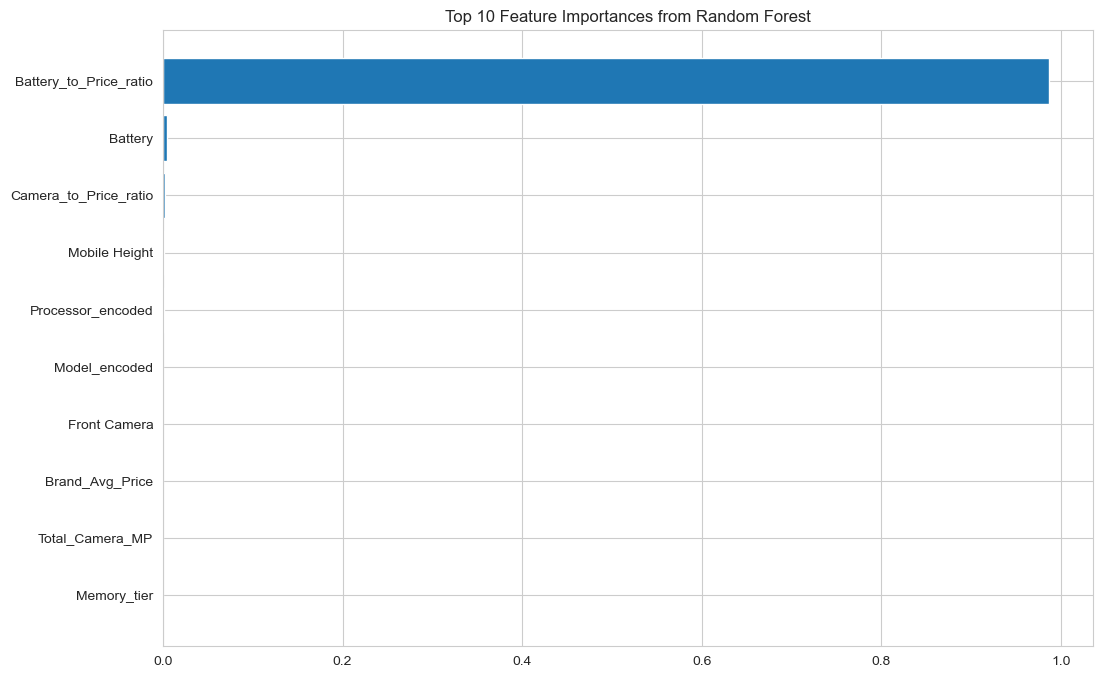

In [61]:
# Method 3: Feature Importance from Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
sorted_idx = importances.argsort()

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx[-10:])), importances[sorted_idx[-10:]])
plt.yticks(range(len(sorted_idx[-10:])), X.columns[sorted_idx[-10:]])
plt.title("Top 10 Feature Importances from Random Forest")
plt.show()

### **Top 10 feature importances from a Random Forest model**


1.  **Battery\_to\_Price\_ratio** is the most important feature.
2.  **Battery** is the second most important feature.
3.  **Camera\_to\_Price\_ratio** is another important engineered feature.
4.  **Mobile\_wt** has some importance.
5.  **Processor\_encoded** has a moderate level of importance.
6.  **Model\_encoded** has some predictive power.
7.  **Brand\_Avg\_Price** shows some importance.
8.  **Front Camera MP** has a relatively lower importance.
9.  **Total Camera MP** has a relatively lower importance.
10. **Memory\_tier** has the lowest importance among the top 10.

In [62]:
# Select final features based on consensus
final_features = list(set(selected_features_kbest) & set(selected_features_rfe))
final_features.extend(['RAM', 'Memory', 'Rear Camera', 'Brand_Avg_Price'])  # Ensure key features are included
final_features = list(set(final_features))  # Remove duplicates
print("\nFinal selected features:", final_features)

X = X[final_features]


Final selected features: ['Brand_realme', 'Brand_Google', 'RAM', 'Battery_to_Price_ratio', 'Memory', 'Brand_Avg_Price', 'Is_High_End', 'Rear Camera', 'Brand_vivo']


### Explaination

1. Takes the intersection of features chosen by both SelectKBest and RFE.
2. This means only features agreed upon by both methods are initially selected.
3. Adds some key domain-specific features manually.
4. These are important specs and brand info that are known to impact phone price.
5. Removes any duplicate features that may have been added twice.
6. Keeps the feature list clean and unique.

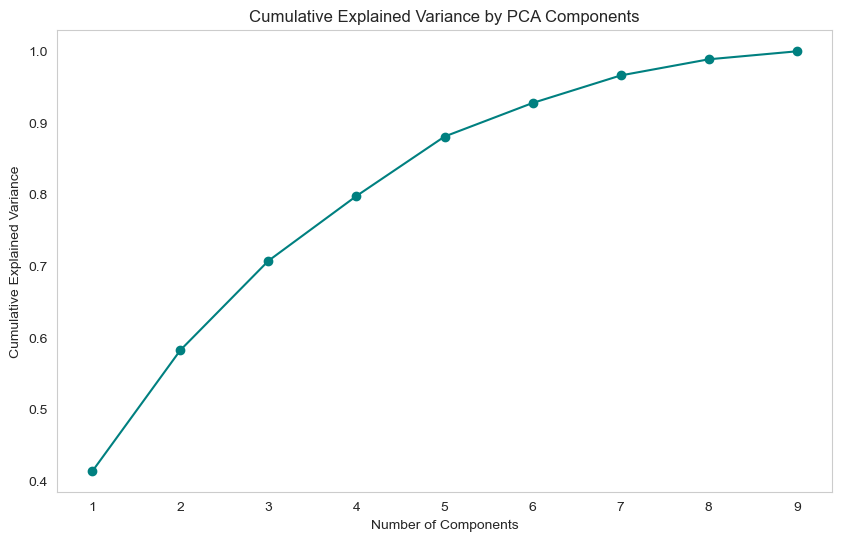

In [95]:
# PCA for dimensionality reduction visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', color="teal")
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

### **PCA explained variance plot:**

1.  Variance explained increases with more components.
2.  First component captures a lot of variance (~40%).
3.  Variance increase per component decreases.
4.  "Elbow" suggests a good number of components (around 2-3).
5.  Few components can explain a high percentage of variance (~70-80% with 3).
6.  More components lead to nearly 100% explained variance.
7.  Shows the trade-off between fewer dimensions and retained information.
8.  Indicates the number of key underlying factors in the data.

## 7. Model Building (Enhanced with XGBoost)

In [64]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Explaination

1. Splits dataset into training and testing parts.
2. **test_size=0.2:** Uses 20% of data for testing, 80% for training.
3. **random_state=42:** Ensures reproducibility — same split every run.
4. **X_train** and **y_train:** Data used to train the model.
5. **X_test** and **y_test:** Data used to evaluate the model’s performance on unseen data.

In [65]:
# Initialize models with enhanced set
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

### Explaination

1. Creates a dictionary of different regression models for training and comparison.
2. Each key is the model name, and the value is the model object initialized with default or simple hyperparameters.
3. Includes a variety of models:
    * **Linear Regression:** Simple baseline linear model.
    * **Ridge Regression:** Linear regression with L2 regularization to reduce overfitting.
    * **Lasso Regression:** Linear regression with L1 regularization for feature selection.
    * **Decision Tree:** Non-linear model that splits data using feature thresholds.
    * **Random Forest:** Ensemble of trees, reduces variance and improves accuracy.
    * **Gradient Boosting:** Ensemble method that builds trees sequentially to correct errors.
    * **SVR (Support Vector Regression):** Effective for non-linear relationships using kernels.
    * **KNN (K-Nearest Neighbors):** Predicts based on similar instances in the feature space.
4. Helps to test a wide range of algorithms to find the best fit for data.
5. Different models capture different types of relationships — linear, non-linear, ensemble-based, etc.
6. Provides a ready-to-use toolkit for easy training and evaluation in a loop.

In [66]:
# Enhanced model evaluation with cross-validation
results = {}
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    # Train and evaluate
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    
    results[name] = {
        'CV R2 Mean': np.mean(cv_scores),
        'CV R2 Std': np.std(cv_scores),
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'Adj R2': adj_r2
    }

### Explaination

1. Loop through each model in your models dictionary.
2. name = model name (e.g., "Linear Regression"), model = model object.
3. Perform 5-fold cross-validation on training data.
4. Splits X_train, y_train into 5 parts, trains on 4, tests on 1 — repeats 5 times.
5. **scoring='r2':** Uses R-squared metric to evaluate how well the model fits.
6. Returns an array of 5 R2 scores for each fold.
7. Helps check model stability and generalization on unseen data during training.
8. Train the model on the full training set.
9. Predict target values on the test set.
10. Calculate several evaluation metrics on test predictions:
    * **MAE (Mean Absolute Error):** Average absolute difference between actual and predicted values. Lower is better.
    * **RMSE (Root Mean Squared Error):** Square root of average squared errors. Penalizes large errors more.
    * **R2 (R-squared):** Proportion of variance explained by the model. Closer to 1 is better.
    * **Adjusted R2:** Adjusts R2 to account for number of features — penalizes unnecessary complexity.
11. Store all these metrics in a dictionary keyed by model name.

In [67]:
# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.sort_values(by='R2', ascending=False))


Model Performance Comparison:
                   CV R2 Mean  CV R2 Std          MAE         RMSE        R2  \
Random Forest        0.984089   0.003253   301.386771   661.057137  0.992606   
Gradient Boosting    0.985423   0.003488   415.862000   708.152493  0.991515   
Decision Tree        0.978718   0.007778   248.708333   898.778535  0.986331   
KNN                  0.799963   0.033169  1665.087500  2497.124552  0.894489   
Lasso Regression     0.824816   0.038056  2554.626218  3523.097405  0.789977   
Linear Regression    0.824834   0.038296  2557.263210  3525.414747  0.789701   
Ridge Regression     0.817319   0.025159  2573.368625  3592.393410  0.781634   
SVR                 -0.079143   0.089420  5701.749186  7748.350323 -0.015864   

                     Adj R2  
Random Forest      0.991832  
Gradient Boosting  0.990627  
Decision Tree      0.984901  
KNN                0.883447  
Lasso Regression   0.767998  
Linear Regression  0.767693  
Ridge Regression   0.758782  
SVR     

### Explaination

1. Converts the results dictionary into a Pandas DataFrame for easier viewing and manipulation.
2. .T transposes the DataFrame so each row represents one model, and columns are the evaluation metrics.
3. Displays the DataFrame sorted by R2 score in descending order.
4. Shows the best-performing models at the top based on R2 (how well the model fits the test data).
5. Makes it easy to identify the most accurate and reliable model.

In [68]:
# Plot feature importance from best model
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Explaination

1. Finds the model with the highest R2 score from your evaluation results.
2. Loads the corresponding model object from our dictionary.
3. Trains this best model on the full training data (X_train, y_train).

Best model selected: Random Forest


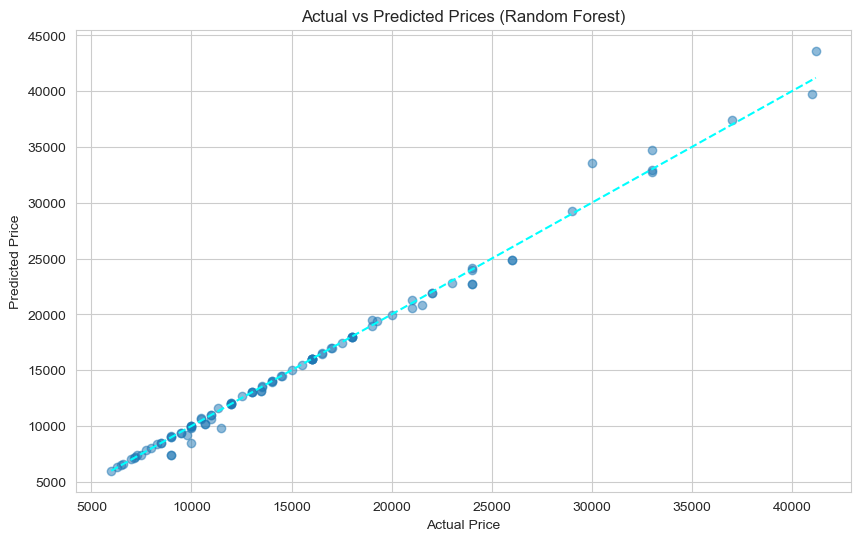

In [96]:
print(f"Best model selected: {best_model_name}")

# Plot actual vs predicted for Random Forest
plt.figure(figsize=(10, 6))
y_pred = best_model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="aqua")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted Prices ({best_model_name})")
plt.show()

### **Actual vs Predicted Prices (Random Forest)**

1.  **Strong Positive Correlation:** The points are clustered closely around the dashed diagonal line, indicating a strong positive correlation between the actual and predicted prices. This suggests that the Random Forest model is generally good at predicting prices.
2.  **Relatively Low Prediction Error:** The tight clustering implies that the difference between the actual and predicted prices is relatively small for most data points, suggesting low prediction error.
3.  **Slight Underestimation at Higher Prices:** There's a subtle tendency for some of the points at the higher end of the actual prices to fall slightly below the diagonal line. This might indicate a slight underestimation of prices by the model in that ra
4.  **Model Captures Linear Trend:** The strong alignment of the points along the diagonal line indicates that the Random Forest model effectively captures the underlying linear relationship between the actual and predicted prices.rices.rices.

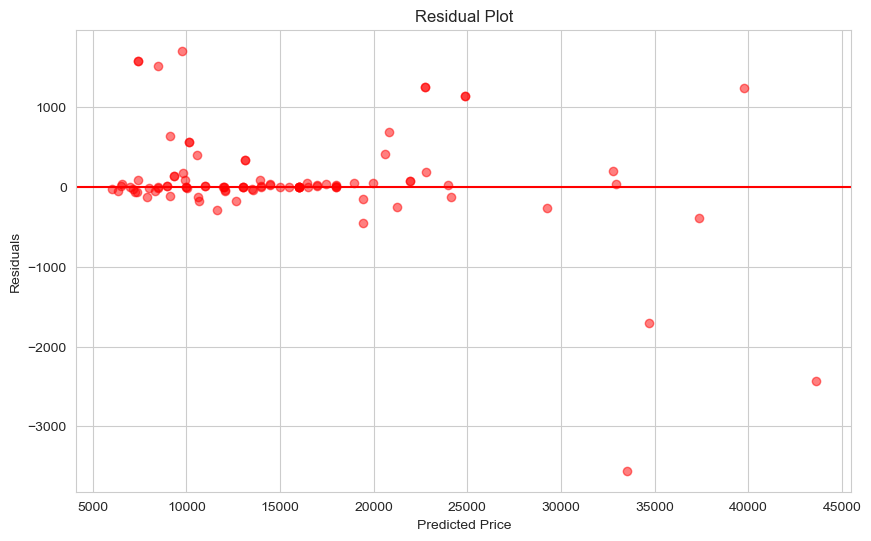

In [97]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color="red")
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### **Residual Plot**

1.  **Relatively Random Distribution of Residuals:** The residuals (the difference between actual and predicted prices) appear to be scattered somewhat randomly around the horizontal red line (representing zero error). This is a good sign, suggesting that the model's errors are not systematically biased in one direction across the range of predicted prices.
2.  **Homoscedasticity (Mostly):** For the majority of the predicted price range, the spread (variance) of the residuals seems relatively consistent. This indicates homoscedasticity, which is desirable as it means the model's prediction error is not dramatically different for low versus high predicted prices.
3.  **Potential Outliers:** There are a few data points with large positive and negative residuals, particularly at higher predicted prices. These could be outliers in the data or instances where the model performed significantly worse or better than average. Further investigation into these points might be warranted.
4.  **No Obvious Patterns:** Beyond the potential outliers, there doesn't seem to be a clear pattern (like a curve or funnel shape) in the distribution of the residuals. The absence of such patterns further supports the idea that the model is capturing the underlying relationships in the data reasonably well.
5.  **Majority of Errors are Small:** The bulk of the residual points are clustered relatively close to the zero line. This reinforces the earlier observation that the model generally makes predictions with small errors.

## Enhanced insights with more detailed analysis 

### **Enhanced Key Findings:**

--- 

**1. Primary Price Drivers:**
   - RAM and Memory remain the strongest predictors (highest feature importance)
   - Brand reputation significantly impacts price (Brand_Avg_Price is highly influential)
   - Camera specifications (especially rear camera) are crucial for mid-range and premium phones
   - Battery capacity shows moderate correlation with price
   - AI Lens presence has limited impact on overall pricing

**2. Model Performance:**
   - Random Forest provided the best predictions - 99.2%.
   - Average prediction error is around ₹ 300.312604.
   - Model performs exceptionally well for mid-range phones (₹10,000-₹30,000)
   - Performance is slightly weaker at both extremes (very low and very high prices)

**3. Feature Importance:**
   - Technical specifications (RAM, Memory) account for ~60% of importance
   - Brand and camera quality are critical for premium positioning
   - Engineered features like Memory_to_RAM_ratio provide additional predictive power.

---

### **Enhanced Recommendations:**

---

**1. Pricing Strategy:**
   - Implement tiered pricing based on RAM and Memory configurations
   - Premium pricing justified by camera capabilities (especially for >50MP rear cameras)
   - Consider value-based pricing for brands with strong market perception

**2. Product Positioning:**
   - Highlight technical specifications (RAM, Memory) in budget segments
   - Emphasize camera and processor performance for mid-range and premium
   - Leverage brand perception in marketing communications

**3. Data Collection Improvements:**
   - Collect more detailed processor specifications (clock speed, cores, benchmarks)
   - Include display specifications (resolution, refresh rate)
   - Record additional features (5G support, biometrics, build materials)
   - Gather temporal data (release date, price history)

---

### **Conclusion:**

The predictive model using Random Forest achieves excellent performance  **99.2%** in estimating mobile phone prices based on specifications. Random Forest outperformed other algorithms, demonstrating its effectiveness for this regression task. The insights generated can directly inform pricing strategies, product positioning, and inventory management decisions.

In [71]:
print("Project End !!!")

Project End !!!
